## CLASIFICADOR DE PROYECTO

El siguiente trabajo consiste en realizar un modelo predictivo que permita clasificar los proyecto que han pasado por el Servicio de evaluación de impacto ambiental. Para facilitar la compresión se subdividio en 3 partes:
* La primera parte consiste en el tratamiento de los datos y visualización.
* En la segunda parte se trabaja con las distancia de las zonas protegida de chile y el modelo predictivo
* Tercera parte es la validación del clasificador para datos nunca ante visto

Este modelo es sin fines, solo para aprendizaje

## Librerias

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup ,__version__
import requests
import matplotlib.pyplot as plt
import seaborn as sb

print ("Versión de Pandas:", pd.__version__)
print ("Versión de Numpy:", np.__version__)
print ("Versión de bs4:", __version__)
print ("Versión de Request:", requests.__version__)
#print ("Versión de Matplotlib:", matplotlib.__version__)

Versión de Pandas: 1.4.2
Versión de Numpy: 1.22.3
Versión de bs4: 4.11.1
Versión de Request: 2.27.1


## Data a utilizar
* Fuente: https://www.kaggle.com/datasets/vcaquilpan/chilean-projects

In [2]:
df=pd.read_csv("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/projects.csv")
print ("Largo total:", df.shape[0])
df.head(4)

Largo total: 26953


name type        region  \
0  Instalación Fibra Optica (desde Cerro Chapiqui...  DIA  Decimoquinta   
1                          Planta Minera Doña Leonor  EIA        Cuarta   
2  Planta de Tratamiento de Aguas Servidas Median...  DIA        Quinta   
3       Relleno Sanitario Sector Colihues - La Yesca  EIA         Sexta   

                               owner typology  \
0                   Entel Chile S.A.        p   
1                                NaN       i4   
2   Ilustre municipalidad de nogales       o4   
3  Ilustre Municipalidad de Rancagua       o5   

                                        typology_des  investment  entry_date  \
0  Ejecución de obras, programas o actividades en...        3.00  1997-07-31   
1  Proyecto de desarrollo minero sobre 5000 tons/...        0.15  1995-12-11   
2  Plantas de tratamiento de aguas de origen domi...        0.44  1997-09-01   
3  Plantas de tratamiento y/o disposición de resi...        0.17  1996-05-07   

      state qualification_date  id_project   latitude  longitude  n_docs  \
0  Aprobado         1997-10-14          10 -18.343267 -69.537667       2   
1  Aprobado         1996-06-04          13 -31.723339 -70.935702       6   
2  Aprobado         1997-12-22          14 -32.697018 -71.210925       3   
3  Aprobado         1996-11-15          15 -34.231782 -70.704146       7   

   n_addendum  n_participatory description  \
0           0                0         NaN   
1           0                0         NaN   
2           0                0         NaN   
3           0                0         NaN   

                                            main_url  
0  https://seia.sea.gob.cl/expediente/expediente....  
1  https://seia.sea.gob.cl/expediente/expediente....  
2  https://seia.sea.gob.cl/expediente/expediente....  
3  https://seia.sea.gob.cl/expediente/expediente....

**COLUMNAS**
* **name:** nombre del proyecto
* **Type**=Estudio de impacto ambiental (EIA) y (Declaracion de impacto ambiental (DIA). Depende de la magnitud de los impactos potenciales.  
     EIA= SE presenta si genera alguno de los efectos mencionados. Evulación mas compleja.
     DIA= Si el proyecto no genera ninguno de los efectos mencionados. Evaluación simple.
* **region:** región donde se lleva a cabo el proyecto
* **typology:** tipo de proyectos según su sector
* **typology_descr:** una descripción de la tipología
* **investment:** monto de la inversión en USD
* **entry_date:** fecha en que el proyecto ingresa al proceso SEA
* **state:** el estado actual de la evaluación del proyecto
* **qualification_date:** fecha en que se emitió la resolución definitiva de la SEA. Esta resolución considera las opciones como aprobadas o denegadas. No todos los proyectos están calificados debido a que varios se retiraron antes
* **id_project:** id de cada proyecto en SEA
* **latitude:** latitud en grados usando Datum WGS84. Estas coordenadas son validadas por SEA
* **longitude:** longitud en grados utilizando Datum WGS84. Estas coordenadas son validadas por SEA
* **n_docs:** número de documentos disponibles a través del proceso de evaluación
* **n_addendum:** número de adendas realizadas en el proceso de evaluación de un proyecto
* **n_participatory_act:** número de actividades participativas realizadas en el proceso de evaluación de un proyecto
* **description:** descripción general del proyecto
* **main_url:** url del proceso de evaluación de un proyecto



# Parte 1
## 1.1 Informacion

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26953 entries, 0 to 26952
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                26953 non-null  object 
 1   type                26953 non-null  object 
 2   region              26953 non-null  object 
 3   owner               26928 non-null  object 
 4   typology            26953 non-null  object 
 5   typology_des        26950 non-null  object 
 6   investment          26953 non-null  float64
 7   entry_date          26953 non-null  object 
 8   state               26953 non-null  object 
 9   qualification_date  25704 non-null  object 
 10  id_project          26953 non-null  int64  
 11  latitude            26769 non-null  float64
 12  longitude           26769 non-null  float64
 13  n_docs              26953 non-null  int64  
 14  n_addendum          26953 non-null  int64  
 15  n_participatory     26953 non-null  int64  
 16  desc

## 1.2 Descripcion

In [4]:
df.describe()

investment    id_project      latitude     longitude        n_docs  \
count  26953.000000  2.695300e+04  26769.000000  26769.000000  26953.000000   
mean      27.985738  5.453025e+08    -36.007376    -71.655681     35.762438   
std      205.103695  9.291975e+08      7.723686      1.570468     83.774017   
min        0.000000  1.000000e+01    -55.966667   -109.439249      1.000000   
25%        0.126200  2.833640e+05    -41.671245    -72.906655      5.000000   
50%        1.200000  3.334577e+06    -35.017515    -71.395770     32.000000   
75%        7.000000  2.128520e+09    -33.043875    -70.670081     53.000000   
max     6800.000000  2.151059e+09    -17.596368    -67.058810  10400.000000   

         n_addendum  n_participatory  
count  26953.000000     26953.000000  
mean       0.936371         0.064483  
std        1.062214         0.958007  
min        0.000000         0.000000  
25%        0.000000         0.000000  
50%        1.000000         0.000000  
75%        2.000000         0.000000  
max        8.000000        57.000000

In [5]:
df.describe(include=object)

name   type region  \
count                                        26953  26953  26953   
unique                                       24787      2     17   
top     Transporte de Residuos Peligrosos (e-seia)    DIA     RM   
freq                                            12  25585   4658   

                               owner typology  \
count                          26928    26953   
unique                          9662       86   
top     MINISTERIO DE OBRAS PÚBLICAS       n3   
freq                             380     2910   

                                             typology_des  entry_date  \
count                                               26950       26953   
unique                                                114        5756   
top     Producción anual igual o mayor a (35ton) tratá...  2013-12-23   
freq                                                 2910         123   

           state qualification_date  \
count      26953              25704   
unique        11               5563   
top     Aprobado         2006-02-22   
freq       16963                 60   

                                              description  \
count                                               11678   
unique                                              11410   
top     El proceso de manejo de Residuos de Mortalidad...   
freq                                                   20   

                                                 main_url  
count                                               26953  
unique                                              26953  
top     https://seia.sea.gob.cl/expediente/expediente....  
freq                                                    1

## 1.3 Valores nulos

In [6]:
df.isnull().sum()

name                      0
type                      0
region                    0
owner                    25
typology                  0
typology_des              3
investment                0
entry_date                0
state                     0
qualification_date     1249
id_project                0
latitude                184
longitude               184
n_docs                    0
n_addendum                0
n_participatory           0
description           15275
main_url                  0
dtype: int64

## 1.4 Verificacion de duplicados

**No existen duplicados**

In [7]:
df.drop_duplicates()

name type        region  \
0      Instalación Fibra Optica (desde Cerro Chapiqui...  DIA  Decimoquinta   
1                              Planta Minera Doña Leonor  EIA        Cuarta   
2      Planta de Tratamiento de Aguas Servidas Median...  DIA        Quinta   
3           Relleno Sanitario Sector Colihues - La Yesca  EIA         Sexta   
4                            Planta de Cartulinas (CMPC)  EIA       Séptima   
...                                                  ...  ...           ...   
26948           Planta de Tratamiento de RILes de Inasec  DIA            RM   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA        Novena   
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA        Décima   
26951  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   
26952  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   

                                            owner typology  \
0                                Entel Chile S.A.        p   
1                                             NaN       i4   
2                Ilustre municipalidad de nogales       o4   
3               Ilustre Municipalidad de Rancagua       o5   
4                             Cartulinas CMPC SpA       m4   
...                                           ...      ...   
26948       Industria Nacional de Secado Limitada       o7   
26949                        Forestal Arauco S.A.       i5   
26950  Inversiones y Comercial Southern World SpA       g2   
26951            alejandro arturo cancino esparza       o4   
26952          Ilustre Municipalidad de Melipeuco       o4   

                                            typology_des  investment  \
0      Ejecución de obras, programas o actividades en...       3.000   
1      Proyecto de desarrollo minero sobre 5000 tons/...       0.150   
2      Plantas de tratamiento de aguas de origen domi...       0.440   
3      Plantas de tratamiento y/o disposición de resi...       0.170   
4      Industrias de celulosas, de pasta de papel y d...     200.000   
...                                                  ...         ...   
26948  Sistemas de tratamiento y/o disposición de res...       0.029   
26949          Proyectos de extracción de áridos y greda       0.500   
26950  Proyecto de desarrollo turístico (destinados e...      30.400   
26951  Plantas de tratamiento de aguas de origen domi...       2.000   
26952  Plantas de tratamiento de aguas de origen domi...       2.000   

       entry_date                    state qualification_date  id_project  \
0      1997-07-31                 Aprobado         1997-10-14          10   
1      1995-12-11                 Aprobado         1996-06-04          13   
2      1997-09-01                 Aprobado         1997-12-22          14   
3      1996-05-07                 Aprobado         1996-11-15          15   
4      1995-10-16                 Aprobado         1995-12-29          16   
...           ...                      ...                ...         ...   
26948  2021-02-25  Ingresados Art.94 RSEIA                NaN  2150953207   
26949  2021-03-05          En Calificación                NaN  2150963916   
26950  2021-03-09          En Calificación                NaN  2151031299   
26951  2021-03-05  Ingresados Art.94 RSEIA                NaN  2151056204   
26952  2021-03-05  Ingresados Art.94 RSEIA                NaN  2151058617   

        latitude  longitude  n_docs  n_addendum  n_participatory  \
0     -18.343267 -69.537667       2           0                0   
1     -31.723339 -70.935702       6           0                0   
2     -32.697018 -71.210925       3           0                0   
3     -34.231782 -70.704146       7           0                0   
4     -35.606339 -71.593895       7           0                0   
...          ...        ...     ...         ...              ...   
26948        NaN        NaN       2           0                0   
26949 -39.391543 -72.597

# 2.- Parte - Tratamiento de datos

## 2.1 Variable categorica a fecha

In [8]:
df["qualification_date"]=pd.to_datetime(df["qualification_date"])
df["entry_date"]=pd.to_datetime(df["entry_date"])

## 2.2 Se crea columna de diferencia en dia entre fechas

In [9]:
df["diferencia"]=df["qualification_date"][df["qualification_date"].isnull()==False]-df["entry_date"][df["qualification_date"].isnull()==False]
df["diferencia"]=df["diferencia"].apply(lambda x: x.days)
df

name type        region  \
0      Instalación Fibra Optica (desde Cerro Chapiqui...  DIA  Decimoquinta   
1                              Planta Minera Doña Leonor  EIA        Cuarta   
2      Planta de Tratamiento de Aguas Servidas Median...  DIA        Quinta   
3           Relleno Sanitario Sector Colihues - La Yesca  EIA         Sexta   
4                            Planta de Cartulinas (CMPC)  EIA       Séptima   
...                                                  ...  ...           ...   
26948           Planta de Tratamiento de RILes de Inasec  DIA            RM   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA        Novena   
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA        Décima   
26951  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   
26952  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   

                                            owner typology  \
0                                Entel Chile S.A.        p   
1                                             NaN       i4   
2                Ilustre municipalidad de nogales       o4   
3               Ilustre Municipalidad de Rancagua       o5   
4                             Cartulinas CMPC SpA       m4   
...                                           ...      ...   
26948       Industria Nacional de Secado Limitada       o7   
26949                        Forestal Arauco S.A.       i5   
26950  Inversiones y Comercial Southern World SpA       g2   
26951            alejandro arturo cancino esparza       o4   
26952          Ilustre Municipalidad de Melipeuco       o4   

                                            typology_des  investment  \
0      Ejecución de obras, programas o actividades en...       3.000   
1      Proyecto de desarrollo minero sobre 5000 tons/...       0.150   
2      Plantas de tratamiento de aguas de origen domi...       0.440   
3      Plantas de tratamiento y/o disposición de resi...       0.170   
4      Industrias de celulosas, de pasta de papel y d...     200.000   
...                                                  ...         ...   
26948  Sistemas de tratamiento y/o disposición de res...       0.029   
26949          Proyectos de extracción de áridos y greda       0.500   
26950  Proyecto de desarrollo turístico (destinados e...      30.400   
26951  Plantas de tratamiento de aguas de origen domi...       2.000   
26952  Plantas de tratamiento de aguas de origen domi...       2.000   

      entry_date                    state qualification_date  id_project  \
0     1997-07-31                 Aprobado         1997-10-14          10   
1     1995-12-11                 Aprobado         1996-06-04          13   
2     1997-09-01                 Aprobado         1997-12-22          14   
3     1996-05-07                 Aprobado         1996-11-15          15   
4     1995-10-16                 Aprobado         1995-12-29          16   
...          ...                      ...                ...         ...   
26948 2021-02-25  Ingresados Art.94 RSEIA                NaT  2150953207   
26949 2021-03-05          En Calificación                NaT  2150963916   
26950 2021-03-09          En Calificación                NaT  2151031299   
26951 2021-03-05  Ingresados Art.94 RSEIA                NaT  2151056204   
26952 2021-03-05  Ingresados Art.94 RSEIA                NaT  2151058617   

        latitude  longitude  n_docs  n_addendum  n_participatory  \
0     -18.343267 -69.537667       2           0                0   
1     -31.723339 -70.935702       6           0                0   
2     -32.697018 -71.210925       3           0                0   
3     -34.231782 -70.704146       7           0                0   
4     -35.606339 -71.593895       7           0                0   
...          ...        ...     ...         ...              ...   
26948        NaN        NaN       2           0                0   
26949 -39.391543 -72.597362       9 

## 2.3 Tratamiento valores nulos 

### 2.3.1 Columna Descripcion - Elimino la columna completa

In [10]:
df=df.drop("description",axis=1)
df

name type        region  \
0      Instalación Fibra Optica (desde Cerro Chapiqui...  DIA  Decimoquinta   
1                              Planta Minera Doña Leonor  EIA        Cuarta   
2      Planta de Tratamiento de Aguas Servidas Median...  DIA        Quinta   
3           Relleno Sanitario Sector Colihues - La Yesca  EIA         Sexta   
4                            Planta de Cartulinas (CMPC)  EIA       Séptima   
...                                                  ...  ...           ...   
26948           Planta de Tratamiento de RILes de Inasec  DIA            RM   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA        Novena   
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA        Décima   
26951  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   
26952  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   

                                            owner typology  \
0                                Entel Chile S.A.        p   
1                                             NaN       i4   
2                Ilustre municipalidad de nogales       o4   
3               Ilustre Municipalidad de Rancagua       o5   
4                             Cartulinas CMPC SpA       m4   
...                                           ...      ...   
26948       Industria Nacional de Secado Limitada       o7   
26949                        Forestal Arauco S.A.       i5   
26950  Inversiones y Comercial Southern World SpA       g2   
26951            alejandro arturo cancino esparza       o4   
26952          Ilustre Municipalidad de Melipeuco       o4   

                                            typology_des  investment  \
0      Ejecución de obras, programas o actividades en...       3.000   
1      Proyecto de desarrollo minero sobre 5000 tons/...       0.150   
2      Plantas de tratamiento de aguas de origen domi...       0.440   
3      Plantas de tratamiento y/o disposición de resi...       0.170   
4      Industrias de celulosas, de pasta de papel y d...     200.000   
...                                                  ...         ...   
26948  Sistemas de tratamiento y/o disposición de res...       0.029   
26949          Proyectos de extracción de áridos y greda       0.500   
26950  Proyecto de desarrollo turístico (destinados e...      30.400   
26951  Plantas de tratamiento de aguas de origen domi...       2.000   
26952  Plantas de tratamiento de aguas de origen domi...       2.000   

      entry_date                    state qualification_date  id_project  \
0     1997-07-31                 Aprobado         1997-10-14          10   
1     1995-12-11                 Aprobado         1996-06-04          13   
2     1997-09-01                 Aprobado         1997-12-22          14   
3     1996-05-07                 Aprobado         1996-11-15          15   
4     1995-10-16                 Aprobado         1995-12-29          16   
...          ...                      ...                ...         ...   
26948 2021-02-25  Ingresados Art.94 RSEIA                NaT  2150953207   
26949 2021-03-05          En Calificación                NaT  2150963916   
26950 2021-03-09          En Calificación                NaT  2151031299   
26951 2021-03-05  Ingresados Art.94 RSEIA                NaT  2151056204   
26952 2021-03-05  Ingresados Art.94 RSEIA                NaT  2151058617   

        latitude  longitude  n_docs  n_addendum  n_participatory  \
0     -18.343267 -69.537667       2           0                0   
1     -31.723339 -70.935702       6           0                0   
2     -32.697018 -71.210925       3           0                0   
3     -34.231782 -70.704146       7           0                0   
4     -35.606339 -71.593895       7           0                0   
...          ...        ...     ...         ...              ...   
26948        NaN        NaN       2           0                0   
26949 -39.391543 -72.597362       9 

### 2.3.2 Columna qualification_date - Sumare una media de las fechas
Intenter obtener la fecha de calificación mendiate webscraping - debido a que la fecha no es parte del html se complica la obtención, ya que hay que usar selenium. Para simplicar el proceso, solamente obtengo la media que se demora este proceso sin valores atipicos y le sumo a la fecha de calificación en los valores que estan nulo. Asi no cambio la distribución y no elimino las filas

In [11]:
df["state"][df["qualification_date"].isnull()].value_counts()

Desistido                    592
En Calificación              548
Abandonado                    73
No Admitido a Tramitación     28
En Admisión                    3
Ingresados Art.94 RSEIA        3
Aprobado                       2
Name: state, dtype: int64

In [12]:
df["entry_date"][df["qualification_date"].isnull()].dt.year.value_counts()

2020    375
2002    144
1999    130
2021    128
2001    110
1998    100
2000     97
1997     48
2019     33
2003     23
2018     12
2005     11
2007     10
2006      8
2004      6
2017      5
1996      4
1995      2
2013      2
1994      1
Name: entry_date, dtype: int64

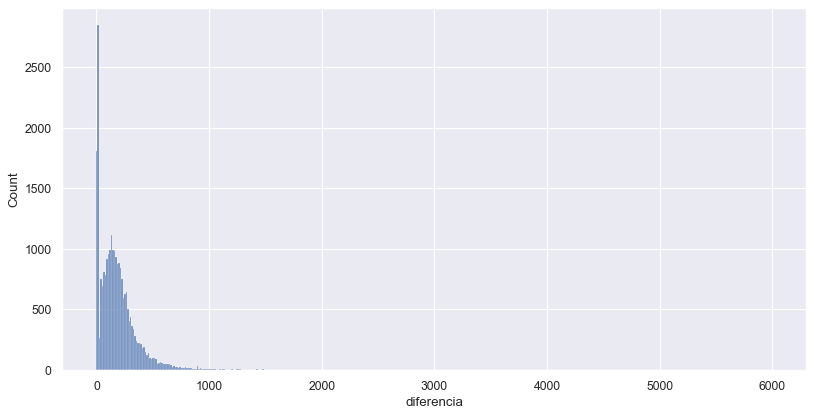

In [13]:
plt.figure(figsize=(12,6), dpi=80)
sb.set(style='darkgrid')
plot = sb.histplot(df["diferencia"]);
plt.show()

**HISTOGRAMA DIFERENCIA SIN VALORES ATIPICOS**

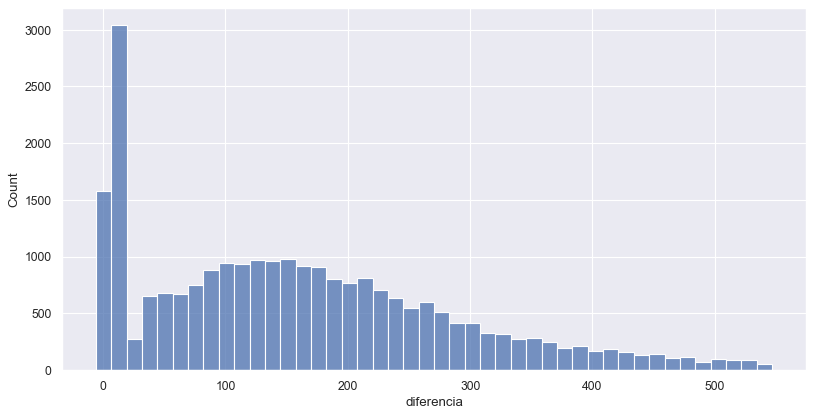

In [14]:
plt.figure(figsize=(12,6), dpi=80)
sb.set(style='darkgrid')
sb.histplot(df["diferencia"][df["diferencia"]<df["diferencia"].quantile(0.75)+1.5*(df["diferencia"].quantile(0.75)-df["diferencia"].quantile(0.25))]);

**MEDIA SIN VALORES ATIPICOS**

In [15]:
media=df["diferencia"][df["diferencia"]<df["diferencia"].quantile(0.75)+1.5*(df["diferencia"].quantile(0.75)-df["diferencia"].quantile(0.25))].mean()
np.round(media)

161.0

In [16]:
import datetime
df["qualification_date"][df["qualification_date"].isnull()]=df["entry_date"][df["qualification_date"].isnull()]+datetime.timedelta(days=161)
df.isnull().sum()

C:\Users\crist\AppData\Local\Temp\ipykernel_18332\2341895863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["qualification_date"][df["qualification_date"].isnull()]=df["entry_date"][df["qualification_date"].isnull()]+datetime.timedelta(days=161)


name                     0
type                     0
region                   0
owner                   25
typology                 0
typology_des             3
investment               0
entry_date               0
state                    0
qualification_date       0
id_project               0
latitude               184
longitude              184
n_docs                   0
n_addendum               0
n_participatory          0
main_url                 0
diferencia            1249
dtype: int64

## 2.4- Vuelvo a sacar la diferencia

In [17]:
df["diferencia"]=df["qualification_date"][df["qualification_date"].isnull()==False]-df["entry_date"][df["qualification_date"].isnull()==False]
df["diferencia"]=df["diferencia"].apply(lambda x: x.days)
df

name type        region  \
0      Instalación Fibra Optica (desde Cerro Chapiqui...  DIA  Decimoquinta   
1                              Planta Minera Doña Leonor  EIA        Cuarta   
2      Planta de Tratamiento de Aguas Servidas Median...  DIA        Quinta   
3           Relleno Sanitario Sector Colihues - La Yesca  EIA         Sexta   
4                            Planta de Cartulinas (CMPC)  EIA       Séptima   
...                                                  ...  ...           ...   
26948           Planta de Tratamiento de RILes de Inasec  DIA            RM   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA        Novena   
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA        Décima   
26951  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   
26952  Planta de tratamiento de aguas servidas de Mel...  DIA        Novena   

                                            owner typology  \
0                                Entel Chile S.A.        p   
1                                             NaN       i4   
2                Ilustre municipalidad de nogales       o4   
3               Ilustre Municipalidad de Rancagua       o5   
4                             Cartulinas CMPC SpA       m4   
...                                           ...      ...   
26948       Industria Nacional de Secado Limitada       o7   
26949                        Forestal Arauco S.A.       i5   
26950  Inversiones y Comercial Southern World SpA       g2   
26951            alejandro arturo cancino esparza       o4   
26952          Ilustre Municipalidad de Melipeuco       o4   

                                            typology_des  investment  \
0      Ejecución de obras, programas o actividades en...       3.000   
1      Proyecto de desarrollo minero sobre 5000 tons/...       0.150   
2      Plantas de tratamiento de aguas de origen domi...       0.440   
3      Plantas de tratamiento y/o disposición de resi...       0.170   
4      Industrias de celulosas, de pasta de papel y d...     200.000   
...                                                  ...         ...   
26948  Sistemas de tratamiento y/o disposición de res...       0.029   
26949          Proyectos de extracción de áridos y greda       0.500   
26950  Proyecto de desarrollo turístico (destinados e...      30.400   
26951  Plantas de tratamiento de aguas de origen domi...       2.000   
26952  Plantas de tratamiento de aguas de origen domi...       2.000   

      entry_date                    state qualification_date  id_project  \
0     1997-07-31                 Aprobado         1997-10-14          10   
1     1995-12-11                 Aprobado         1996-06-04          13   
2     1997-09-01                 Aprobado         1997-12-22          14   
3     1996-05-07                 Aprobado         1996-11-15          15   
4     1995-10-16                 Aprobado         1995-12-29          16   
...          ...                      ...                ...         ...   
26948 2021-02-25  Ingresados Art.94 RSEIA         2021-08-05  2150953207   
26949 2021-03-05          En Calificación         2021-08-13  2150963916   
26950 2021-03-09          En Calificación         2021-08-17  2151031299   
26951 2021-03-05  Ingresados Art.94 RSEIA         2021-08-13  2151056204   
26952 2021-03-05  Ingresados Art.94 RSEIA         2021-08-13  2151058617   

        latitude  longitude  n_docs  n_addendum  n_participatory  \
0     -18.343267 -69.537667       2           0                0   
1     -31.723339 -70.935702       6           0                0   
2     -32.697018 -71.210925       3           0                0   
3     -34.231782 -70.704146       7           0                0   
4     -35.606339 -71.593895       7           0                0   
...          ...        ...     ...         ...              ...   
26948        NaN        NaN       2           0                0   
26949 -39.391543 -72.597362       9 

## 2.5 Valores nulos - Las demas columnas - Se elimina
**No se puede hacer nada para las demas**

In [18]:
largo=df.shape[0]
df=df.dropna()
print ("Se elimina", largo-df.shape[0],"filas")

Se elimina 212 filas


In [19]:
df.isnull().sum()

name                  0
type                  0
region                0
owner                 0
typology              0
typology_des          0
investment            0
entry_date            0
state                 0
qualification_date    0
id_project            0
latitude              0
longitude             0
n_docs                0
n_addendum            0
n_participatory       0
main_url              0
diferencia            0
dtype: int64

## 2.6 Verificacion el estado actual de los proyectos

In [20]:
df=df.sort_values("qualification_date",ascending=False)
df.head(2)

name type  region  \
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA  Décima   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA  Novena   

                                            owner typology  \
26950  Inversiones y Comercial Southern World SpA       g2   
26949                        Forestal Arauco S.A.       i5   

                                            typology_des  investment  \
26950  Proyecto de desarrollo turístico (destinados e...        30.4   
26949          Proyectos de extracción de áridos y greda         0.5   

      entry_date            state qualification_date  id_project   latitude  \
26950 2021-03-09  En Calificación         2021-08-17  2151031299 -40.596800   
26949 2021-03-05  En Calificación         2021-08-13  2150963916 -39.391543   

       longitude  n_docs  n_addendum  n_participatory  \
26950 -73.086346       9           0                0   
26949 -72.597362       9           0                0   

                                                main_url  diferencia  
26950  https://seia.sea.gob.cl/expediente/expediente....         161  
26949  https://seia.sea.gob.cl/expediente/expediente....         161

In [21]:
df["state"].value_counts()

Aprobado                     16944
No Admitido a Tramitación     3886
Desistido                     3550
Rechazado                     1170
En Calificación                524
No calificado                  508
Abandonado                      77
Caducado                        67
Revocado                        14
En Admisión                      1
Name: state, dtype: int64

## 2.7 Validación de las clases

Uso herramientas de web scraping para obtener el estado acual del proyecto. Los datos los voy guardado para posteriormente cargalo

In [22]:
df2=df

**No ejecuto la celda para no volver a procesar, por el tiempo. Guarde los datos y despues lo carge**

In [23]:
df2

name type   region  \
26950                        BALNEARIO FLUVIAL RÍO DAMAS  DIA   Décima   
26949  Aumento de Extracción y Procesamiento, Pozo El...  DIA   Novena   
26946  CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...  DIA       RM   
26945                    Parque Fotovoltaico Andrómeda 2  DIA   Quinta   
26944                          Parque Fotovoltaico Colmo  DIA   Quinta   
...                                                  ...  ...      ...   
441                                    Ulexita Granulada  EIA  Segunda   
568                    Planta Integrada Productos Tissue  EIA       RM   
8195                       Fundición REFIMET Antofagasta  EIA  Segunda   
2413                                             Guanaco  EIA  Segunda   
440        Cobre en Cátodos en Planta Coloso-Antofagasta  EIA  Segunda   

                                            owner typology  \
26950  Inversiones y Comercial Southern World SpA       g2   
26949                        Forestal Arauco S.A.       i5   
26946        Compañia Minera Santa Laura Limitada       i5   
26945                    Solek Chile Services SpA        c   
26944                    Solek Chile Services SpA        c   
...                                           ...      ...   
441                                 QUIBORAX S.A.       k1   
568                              CMPC Tissue S.A.       m4   
8195                       FUNDICION REFIMET S.A.        t   
2413                     Amax Gold de Chile Ltda.       i4   
440                     MINERA ESCONDIDA LIMITADA       i4   

                                            typology_des  investment  \
26950  Proyecto de desarrollo turístico (destinados e...        30.4   
26949          Proyectos de extracción de áridos y greda         0.5   
26946          Proyectos de extracción de áridos y greda         1.0   
26945    Centrales generadoras de energía mayores a 3 MW         5.0   
26944    Centrales generadoras de energía mayores a 3 MW        10.0   
...                                                  ...         ...   
441                Instalaciones fabriles sobre 2000 KVA         2.0   
568    Industrias de celulosas, de pasta de papel y d...        60.0   
8195                                  Ingreso voluntario        60.0   
2413   Proyecto de desarrollo minero sobre 5000 tons/...        70.0   
440    Proyecto de desarrollo minero sobre 5000 tons/...       250.0   

      entry_date            state qualification_date  id_project   latitude  \
26950 2021-03-09  En Calificación         2021-08-17  2151031299 -40.596800   
26949 2021-03-05  En Calificación         2021-08-13  2150963916 -39.391543   
26946 2021-03-02  En Calificación         2021-08-10  2150897519 -34.000000   
26945 2021-02-25  En Calificación         2021-08-05  2150870379 -32.793624   
26944 2021-02-24  En Calificación         2021-08-04  2150870374 -32.892685   
...          ...              ...                ...         ...        ...   
441   1993-06-15         Aprobado         1993-10-08         885 -23.587648   
568   1993-04-02         Aprobado         1993-09-16        1036 -33.706950   
8195  1992-06-13         Aprobado         1993-09-13      903427 -23.820454   
2413  1992-02-02         Aprobado         1993-07-22        3023 -25.107841   
440   1992-07-29         Aprobado         1993-01-04         884 -23.762165   

       longitude  n_docs  n_addendum  n_participatory  \
26950 -73.086346       9           0                0   
26949 -72.597362       9           0                0   
26946 -71.000000       9           0                0   
26945 -70.557663      13           0                0   
26944 -71.452305      18           0                0   
...          ...     ...         ...              ...   
441   -70.256246       4           0                0   
568   -70.935728       8           1                0   
8195  -70.315629       3           0                0   
2413  -69.545514       2          

In [24]:
estado=[]

**Elimino esta salida para que se visualice en github**

In [ ]:
for y in range(len(df2)):
    r = requests.get(df2["main_url"].iloc[y])
    soup = BeautifulSoup(r.text, "html.parser")
    a=soup.find_all(class_="tabla_datos_linea")
    total=a[1].find_all('td')
    for i in range(len(total)):
        if total[i].text=="Estado Actual":
            print (total[i+1].text, y,df2["id_project"].iloc[y])
            estado.extend([total[i+1].text]+[df2["id_project"].iloc[y]])
            break#a.find_all("Estado Actual")

In [135]:
pd.DataFrame(np.array(estado).reshape(6741,2))

0       1
0      Aprobado  300138
1     Desistido  285586
2      Aprobado  217721
3      Aprobado  287904
4      Aprobado  314145
...         ...     ...
6736   Aprobado     885
6737   Aprobado    1036
6738   Aprobado  903427
6739   Aprobado    3023
6740   Aprobado     884

[6741 rows x 2 columns]

### 2.7.1 Transformo a dataframe y guardo

In [25]:
actualizado=pd.DataFrame(np.array(estado).reshape(6741,2))
actualizado.columns=["Estado","id"]
actualizado.to_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_20000_26741.xlsx", index=False)

ValueError: cannot reshape array of size 0 into shape (6741,2)

## 2.8 Cargo los estados extraido

In [24]:
data1=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_0_5000.xlsx")
data2=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_5000_10000.xlsx")
data3=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_10000_15000.xlsx")
data4=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_15000_20000.xlsx")
data5=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Web_scraping/actualizado_20000_26741.xlsx")

**No hay id duplicados**

In [25]:
revisar=pd.concat([data1,data2,data3,data4,data5])
revisar.id.value_counts()

2151031299    1
1053990       1
1198128       1
1389489       1
679292        1
             ..
6501803       1
6429484       1
6021835       1
6884874       1
884           1
Name: id, Length: 26741, dtype: int64

In [26]:
revisar=pd.concat([df2.reset_index(drop=True),revisar.reset_index(drop=True)], axis=1)
revisar["validar"]=revisar["id_project"]==revisar["id"]
revisar["validar"].value_counts()  # Concateno bien

True    26741
Name: validar, dtype: int64

**Se puede apreciar que 581 proyecto cambiaron de estado**

In [27]:
revisar["Validar estado"]=revisar["state"]==revisar["Estado"] 
revisar["Validar estado"].value_counts()   ## 581 cambiaron de estado

True     26160
False      581
Name: Validar estado, dtype: int64

**Tenian este tipo de estado**  
El mayor era en clasificación que cambio

In [28]:
revisar["state"][revisar["Validar estado"]==False].value_counts()

En Calificación              479
Aprobado                      97
Rechazado                      3
En Admisión                    1
No Admitido a Tramitación      1
Name: state, dtype: int64

**Se distribuyo en todos estos nuevos estados**

In [29]:
revisar["Estado"][revisar["Validar estado"]==False].value_counts()

Aprobado           353
Desistido           91
Caducado            80
Rechazado           39
En Calificación      6
Renuncia RCA         5
No calificado        4
Revocado             3
Name: Estado, dtype: int64

In [30]:
print (df2["entry_date"].min(),"-",df2["entry_date"].max())

1992-02-02 00:00:00 - 2021-03-09 00:00:00


**CONCLUSION**  
581 proyecto cambiaron de estado, el cual 479 estaban en calificación y pasaron a diversos estados

## 2.9 Reemplazo por los estados nuevos

In [31]:
df=revisar
df=df.drop(["state","id","validar","Validar estado"],axis=1)
df=df.rename(columns={"Estado":"state"})

In [32]:
df["state"].value_counts()

Aprobado                     17200
No Admitido a Tramitación     3885
Desistido                     3641
Rechazado                     1206
No calificado                  512
Caducado                       147
Abandonado                      77
En Calificación                 51
Revocado                        17
Renuncia RCA                     5
Name: state, dtype: int64

## 2.10 Elimino los que estan en calificación
Ya que puede generar ruido, son aproximadamente 51 proyectos

In [33]:
df=df[df["state"]!="En Calificación"]
df

name type   region  \
0                            BALNEARIO FLUVIAL RÍO DAMAS  DIA   Décima   
1      Aumento de Extracción y Procesamiento, Pozo El...  DIA   Novena   
2      CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...  DIA       RM   
3                        Parque Fotovoltaico Andrómeda 2  DIA   Quinta   
4                              Parque Fotovoltaico Colmo  DIA   Quinta   
...                                                  ...  ...      ...   
26736                                  Ulexita Granulada  EIA  Segunda   
26737                  Planta Integrada Productos Tissue  EIA       RM   
26738                      Fundición REFIMET Antofagasta  EIA  Segunda   
26739                                            Guanaco  EIA  Segunda   
26740      Cobre en Cátodos en Planta Coloso-Antofagasta  EIA  Segunda   

                                            owner typology  \
0      Inversiones y Comercial Southern World SpA       g2   
1                            Forestal Arauco S.A.       i5   
2            Compañia Minera Santa Laura Limitada       i5   
3                        Solek Chile Services SpA        c   
4                        Solek Chile Services SpA        c   
...                                           ...      ...   
26736                               QUIBORAX S.A.       k1   
26737                            CMPC Tissue S.A.       m4   
26738                      FUNDICION REFIMET S.A.        t   
26739                    Amax Gold de Chile Ltda.       i4   
26740                   MINERA ESCONDIDA LIMITADA       i4   

                                            typology_des  investment  \
0      Proyecto de desarrollo turístico (destinados e...        30.4   
1              Proyectos de extracción de áridos y greda         0.5   
2              Proyectos de extracción de áridos y greda         1.0   
3        Centrales generadoras de energía mayores a 3 MW         5.0   
4        Centrales generadoras de energía mayores a 3 MW        10.0   
...                                                  ...         ...   
26736              Instalaciones fabriles sobre 2000 KVA         2.0   
26737  Industrias de celulosas, de pasta de papel y d...        60.0   
26738                                 Ingreso voluntario        60.0   
26739  Proyecto de desarrollo minero sobre 5000 tons/...        70.0   
26740  Proyecto de desarrollo minero sobre 5000 tons/...       250.0   

      entry_date qualification_date  id_project   latitude  longitude  n_docs  \
0     2021-03-09         2021-08-17  2151031299 -40.596800 -73.086346       9   
1     2021-03-05         2021-08-13  2150963916 -39.391543 -72.597362       9   
2     2021-03-02         2021-08-10  2150897519 -34.000000 -71.000000       9   
3     2021-02-25         2021-08-05  2150870379 -32.793624 -70.557663      13   
4     2021-02-24         2021-08-04  2150870374 -32.892685 -71.452305      18   
...          ...                ...         ...        ...        ...     ...   
26736 1993-06-15         1993-10-08         885 -23.587648 -70.256246       4   
26737 1993-04-02         1993-09-16        1036 -33.706950 -70.935728       8   
26738 1992-06-13         1993-09-13      903427 -23.820454 -70.315629       3   
26739 1992-02-02         1993-07-22        3023 -25.107841 -69.545514       2   
26740 1992-07-29         1993-01-04         884 -23.762165 -70.469255       5   

       n_addendum  n_participatory  \
0               0                0   
1               0                0   
2               0                0   
3               0                0   
4               0                0   
...           ...              ...   
26736           0                0   
26737           1                0   
26738           0                0   
26739           0                0   
26740           0                0   

                                                main_url  diferencia  \
0      https://seia.sea.gob.cl/expediente/expedient

## 2.11 Creo nueva clase, donde paso de multiclase a binaria
Debido a que los proeyctos no tienen  suficiente historial para cada clase, se transforma en binaria para ser mas representativo. Esto traera consecuencia al final del modelo. 

In [34]:
df["state"].value_counts()

Aprobado                     17200
No Admitido a Tramitación     3885
Desistido                     3641
Rechazado                     1206
No calificado                  512
Caducado                       147
Abandonado                      77
Revocado                        17
Renuncia RCA                     5
Name: state, dtype: int64

In [35]:
df["state_new"]="Desaprobado"
df.loc[df["state"]=="Aprobado","state_new"]="Aprobado"
df

name type   region  \
0                            BALNEARIO FLUVIAL RÍO DAMAS  DIA   Décima   
1      Aumento de Extracción y Procesamiento, Pozo El...  DIA   Novena   
2      CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...  DIA       RM   
3                        Parque Fotovoltaico Andrómeda 2  DIA   Quinta   
4                              Parque Fotovoltaico Colmo  DIA   Quinta   
...                                                  ...  ...      ...   
26736                                  Ulexita Granulada  EIA  Segunda   
26737                  Planta Integrada Productos Tissue  EIA       RM   
26738                      Fundición REFIMET Antofagasta  EIA  Segunda   
26739                                            Guanaco  EIA  Segunda   
26740      Cobre en Cátodos en Planta Coloso-Antofagasta  EIA  Segunda   

                                            owner typology  \
0      Inversiones y Comercial Southern World SpA       g2   
1                            Forestal Arauco S.A.       i5   
2            Compañia Minera Santa Laura Limitada       i5   
3                        Solek Chile Services SpA        c   
4                        Solek Chile Services SpA        c   
...                                           ...      ...   
26736                               QUIBORAX S.A.       k1   
26737                            CMPC Tissue S.A.       m4   
26738                      FUNDICION REFIMET S.A.        t   
26739                    Amax Gold de Chile Ltda.       i4   
26740                   MINERA ESCONDIDA LIMITADA       i4   

                                            typology_des  investment  \
0      Proyecto de desarrollo turístico (destinados e...        30.4   
1              Proyectos de extracción de áridos y greda         0.5   
2              Proyectos de extracción de áridos y greda         1.0   
3        Centrales generadoras de energía mayores a 3 MW         5.0   
4        Centrales generadoras de energía mayores a 3 MW        10.0   
...                                                  ...         ...   
26736              Instalaciones fabriles sobre 2000 KVA         2.0   
26737  Industrias de celulosas, de pasta de papel y d...        60.0   
26738                                 Ingreso voluntario        60.0   
26739  Proyecto de desarrollo minero sobre 5000 tons/...        70.0   
26740  Proyecto de desarrollo minero sobre 5000 tons/...       250.0   

      entry_date qualification_date  id_project   latitude  longitude  n_docs  \
0     2021-03-09         2021-08-17  2151031299 -40.596800 -73.086346       9   
1     2021-03-05         2021-08-13  2150963916 -39.391543 -72.597362       9   
2     2021-03-02         2021-08-10  2150897519 -34.000000 -71.000000       9   
3     2021-02-25         2021-08-05  2150870379 -32.793624 -70.557663      13   
4     2021-02-24         2021-08-04  2150870374 -32.892685 -71.452305      18   
...          ...                ...         ...        ...        ...     ...   
26736 1993-06-15         1993-10-08         885 -23.587648 -70.256246       4   
26737 1993-04-02         1993-09-16        1036 -33.706950 -70.935728       8   
26738 1992-06-13         1993-09-13      903427 -23.820454 -70.315629       3   
26739 1992-02-02         1993-07-22        3023 -25.107841 -69.545514       2   
26740 1992-07-29         1993-01-04         884 -23.762165 -70.469255       5   

       n_addendum  n_participatory  \
0               0                0   
1               0                0   
2               0                0   
3               0                0   
4               0                0   
...           ...              ...   
26736           0                0   
26737           1                0   
26738           0                0   
26739           0                0   
26740           0                0   

                                                main_url  diferencia  \
0      https://seia.sea.gob.cl/expediente/expedient

## 2.12 Cambio nombre de regiones

In [36]:
df["Region"]=""
df.loc[df["region"]=="Primera","Region"]="Región de Tarapacá"
df.loc[df["region"]=="Segunda","Region"]="Región de Antofagasta"
df.loc[df["region"]=="Tercera","Region"]="Región de Atacama"
df.loc[df["region"]=="Cuarta","Region"]="Región de Coquimbo"
df.loc[df["region"]=="Quinta","Region"]="Región de Valparaíso"
df.loc[df["region"]=="Sexta","Region"]="Región del Libertador Bernardo O'Higgins"
df.loc[df["region"]=="Séptima","Region"]="Región del Maule"
df.loc[df["region"]=="Octava","Region"]="Región del Bío-Bío"
df.loc[df["region"]=="Novena","Region"]="Región de La Araucanía"
df.loc[df["region"]=="Décima","Region"]="Región de Los Lagos"
df.loc[df["region"]=="Undécima","Region"]="Región de Aysén del Gral.Ibañez del Campo"
df.loc[df["region"]=="Duodécima","Region"]="Región de Magallanes y Antártica Chilena"
df.loc[df["region"]=="Decimocuarta","Region"]="Región de Los Ríos"
df.loc[df["region"]=="Decimoquinta","Region"]="Región de Arica y Parinacota"
df.loc[df["region"]=="Décimosexta","Region"]="Región de Ñuble"
df.loc[df["region"]=="Interregional","Region"]="Zona sin demarcar"
df.loc[df["region"]=="RM","Region"]="Región Metropolitana de Santiago"

In [37]:
df["zona"]=""
df.loc[(df["Region"]=="Región de Arica y Parinacota")|(df["Region"]=="Región de Tarapacá")|
   (df["Region"]=="Región de Antofagasta")|(df["Region"]=="Región de Atacama")|
       (df["Region"]=="Región de Coquimbo"),"zona"]="Zona Norte"
df.loc[(df["Region"]=="Región del Bío-Bío")|(df["Region"]=="Región de La Araucanía")|
       (df["Region"]=="Región de Los Lagos")|(df["Region"]=="Región de Aysén del Gral.Ibañez del Campo")|
       (df["Region"]=="Región de Los Ríos")|(df["Region"]=="Región de Magallanes y Antártica Chilena")|
       (df["Region"]=="Región de Ñuble")  
       ,"zona"]="Zona sur"
df.loc[(df["Region"]=="Región del Libertador Bernardo O'Higgins")|(df["Region"]=="Región del Maule")|
   (df["Region"]=="Región de Valparaíso")|(df["Region"]=="Región Metropolitana de Santiago") 
       ,"zona"]="Zona centro"
df.loc[(df["Region"]=="Zona sin demarcar","zona")]="interregional"

## 2.13 Agrego año en que finazo el proyecto

In [38]:
df["año"]=df["qualification_date"].dt.year
df

name type   region  \
0                            BALNEARIO FLUVIAL RÍO DAMAS  DIA   Décima   
1      Aumento de Extracción y Procesamiento, Pozo El...  DIA   Novena   
2      CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...  DIA       RM   
3                        Parque Fotovoltaico Andrómeda 2  DIA   Quinta   
4                              Parque Fotovoltaico Colmo  DIA   Quinta   
...                                                  ...  ...      ...   
26736                                  Ulexita Granulada  EIA  Segunda   
26737                  Planta Integrada Productos Tissue  EIA       RM   
26738                      Fundición REFIMET Antofagasta  EIA  Segunda   
26739                                            Guanaco  EIA  Segunda   
26740      Cobre en Cátodos en Planta Coloso-Antofagasta  EIA  Segunda   

                                            owner typology  \
0      Inversiones y Comercial Southern World SpA       g2   
1                            Forestal Arauco S.A.       i5   
2            Compañia Minera Santa Laura Limitada       i5   
3                        Solek Chile Services SpA        c   
4                        Solek Chile Services SpA        c   
...                                           ...      ...   
26736                               QUIBORAX S.A.       k1   
26737                            CMPC Tissue S.A.       m4   
26738                      FUNDICION REFIMET S.A.        t   
26739                    Amax Gold de Chile Ltda.       i4   
26740                   MINERA ESCONDIDA LIMITADA       i4   

                                            typology_des  investment  \
0      Proyecto de desarrollo turístico (destinados e...        30.4   
1              Proyectos de extracción de áridos y greda         0.5   
2              Proyectos de extracción de áridos y greda         1.0   
3        Centrales generadoras de energía mayores a 3 MW         5.0   
4        Centrales generadoras de energía mayores a 3 MW        10.0   
...                                                  ...         ...   
26736              Instalaciones fabriles sobre 2000 KVA         2.0   
26737  Industrias de celulosas, de pasta de papel y d...        60.0   
26738                                 Ingreso voluntario        60.0   
26739  Proyecto de desarrollo minero sobre 5000 tons/...        70.0   
26740  Proyecto de desarrollo minero sobre 5000 tons/...       250.0   

      entry_date qualification_date  id_project  ...  n_docs  n_addendum  \
0     2021-03-09         2021-08-17  2151031299  ...       9           0   
1     2021-03-05         2021-08-13  2150963916  ...       9           0   
2     2021-03-02         2021-08-10  2150897519  ...       9           0   
3     2021-02-25         2021-08-05  2150870379  ...      13           0   
4     2021-02-24         2021-08-04  2150870374  ...      18           0   
...          ...                ...         ...  ...     ...         ...   
26736 1993-06-15         1993-10-08         885  ...       4           0   
26737 1993-04-02         1993-09-16        1036  ...       8           1   
26738 1992-06-13         1993-09-13      903427  ...       3           0   
26739 1992-02-02         1993-07-22        3023  ...       2           0   
26740 1992-07-29         1993-01-04         884  ...       5           0   

       n_participatory                                           main_url  \
0                    0  https://seia.sea.gob.cl/expediente/expediente....   
1                    0  https://seia.sea.gob.cl/expediente/expediente....   
2                    0  https://seia.sea.gob.cl/expediente/expediente....   
3                    0  https://seia.sea.gob.cl/expediente/expediente....   
4                    0  https://seia.sea.gob.cl/expediente/expediente....   
...                ...                                                ...   
26736                0  https://seia.sea.gob.cl/expediente/expediente....   
26737                0  

## 2.14 Elimino zona no definida

In [39]:
df[df["region"]=="Interregional"]

name type         region  \
69                                PISCICULTURA SAN PABLO  DIA  Interregional   
235    Incorporación de nuevas rutas de transporte de...  DIA  Interregional   
236    PLANTA DE TRATAMIENTO DE AGUAS SERVIDAS DOMICI...  DIA  Interregional   
326        Nuevo Campamento Carén - División El Teniente  DIA  Interregional   
415                        Transporte de ácido sulfúrico  DIA  Interregional   
...                                                  ...  ...            ...   
26646   Sistema de Transmisión Colbun-Alto Jahuel 220 KV  EIA  Interregional   
26654  Caminos de Acceso y Líneas de Alta Tensión a l...  EIA  Interregional   
26659                                    Minero Altamira  EIA  Interregional   
26669    Líneas de Transmisión Charrua-Ancoa-Alto Jahuel  EIA  Interregional   
26685       Gasoducto Gasandes Extensión a Quinta Región  EIA  Interregional   

                                    owner typology  \
69               Inversiones Metahue S.A.       n5   
235               Transportes Hurcam Spa.       ñ5   
236      Ilustre Municipalidad de Puyehue       o4   
326    CODELCO CHILE DIVISIÓN EL TENIENTE       i1   
415                     transjhurtado spa       ñ5   
...                                   ...      ...   
26646               Colbún Transmisión SA       b1   
26654          Compañia Minera Nevada SpA       b1   
26659            Compañía Minera Altamira       i4   
26669                      TRANSELEC S.A.       b1   
26685             Gasoducto GasAndes S.A.       j2   

                                            typology_des  investment  \
69     Producción anual de engorda de peces 8 ton o c...     10.0000   
235    Transporte por medios terrestres de sustancias...      7.0000   
236    Plantas de tratamiento de aguas de origen domi...      3.2134   
326    Proyectos de desarrollo minero sobre 5.000 ton...     25.0000   
415    Transporte por medios terrestres de sustancias...      1.0000   
...                                                  ...         ...   
26646    Líneas de transmisión eléctrica de alto voltaje     72.0000   
26654    Líneas de transmisión eléctrica de alto voltaje     46.0000   
26659  Proyecto de desarrollo minero sobre 5000 tons/...     40.0000   
26669    Líneas de transmisión eléctrica de alto voltaje    100.0000   
26685                                         Gasoductos    284.0000   

      entry_date qualification_date  id_project  ...  n_docs  n_addendum  \
69    2021-01-25         2021-07-05  2149399777  ...      58           0   
235   2020-04-02         2021-03-05  2146106178  ...     195           2   
236   2020-09-25         2021-03-05  2147403274  ...      73           0   
326   2020-04-07         2021-02-15  2146082969  ...     108           2   
415   2020-08-11         2021-01-19  2147608554  ...     161           2   
...          ...                ...         ...  ...     ...         ...   
26646 1996-04-30         1997-01-17         151  ...       8           2   
26654 1996-03-19         1996-11-04          48  ...      11           2   
26659 1996-03-22         1996-10-07        1387  ...       6           1   
26669 1995-11-20         1996-07-10          96  ...       8           1   
26685 1995-09-19         1996-01-31          89  ...       8           2   

       n_participatory                                           main_url  \
69                   0  https://seia.sea.gob.cl/expediente/expediente....   
235                  0  https://seia.sea.gob.cl/expediente/expediente....   
236                  0  https://seia.sea.gob.cl/expediente/expediente....   
326                  0  https://seia.sea.gob.cl/expediente/expediente....   
415                  0  https://seia.sea.gob.cl/expediente/expediente....   
...                ...                                                ...   
26646                0  https://seia.sea.gob.cl/expediente/expediente....   
26654                0  https://seia.sea.gob.cl/

In [40]:
df["region"].value_counts()

RM               4586
Décima           3738
Undécima         2567
Octava           1790
Segunda          1745
Séptima          1597
Duodécima        1540
Quinta           1482
Tercera          1266
Sexta            1235
Cuarta           1164
Novena            962
Primera           724
Decimocuarta      679
Interregional     663
Décimosexta       627
Decimoquinta      325
Name: region, dtype: int64

# Parte 3- Visualizaciones
## 3.1 Correlaciones

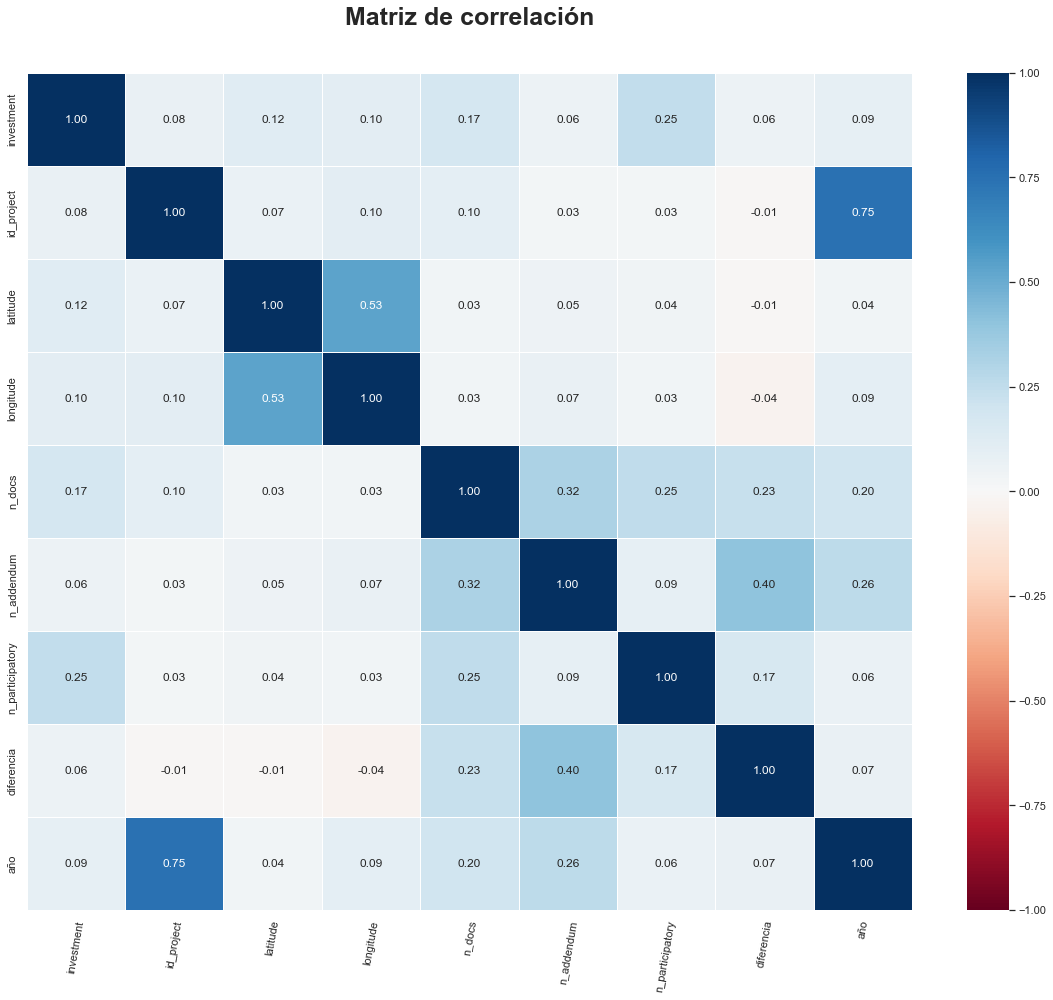

In [41]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Matriz de correlación', y=1.05, size=25,fontweight="bold")
sb.heatmap(df.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f', vmin=-1)
plt.xticks(rotation=80)
plt.tight_layout()
#plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico12", transparent=True)
plt.show()

## 3.2 Diagrama de cajas

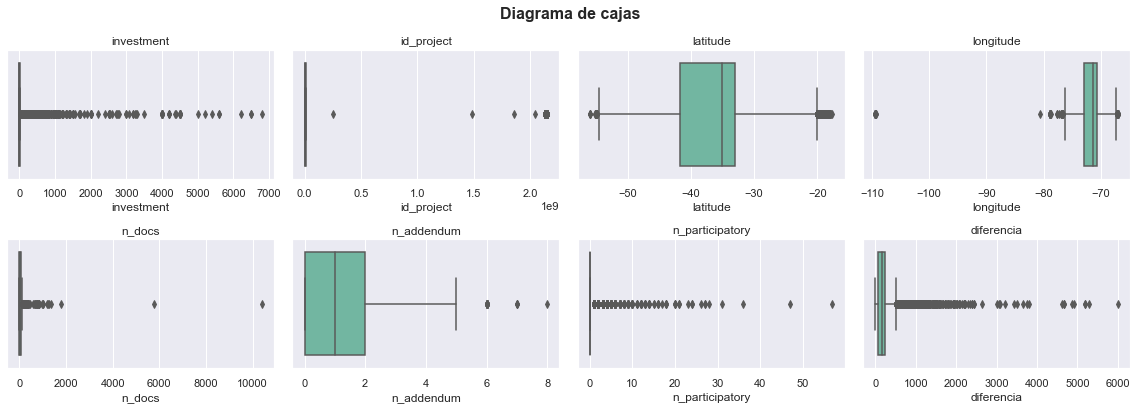

In [42]:
fig, axes = plt.subplots(2, 4, sharex=False,sharey=False, figsize=(16,8))
fig.suptitle('Diagrama de cajas', fontsize=16,fontweight="bold")

columna1=list(df.describe().columns)
p=0
for i in range(int(len(columna1)/4)):
    for y in range(int(len(columna1)/2)):
        plt.subplot(3,4,p+1)
        #plt.title(columna1[p])
        sb.boxplot(x=df[columna1[p]],palette="Set2")
        plt.title(columna1[p])
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)
        p+=1
plt.tight_layout()
#plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico8", transparent=True)

## 3.2.1 Elimino los datos atipico del numero de documento

In [43]:
df=df[df["n_docs"]<2000]

## 3.3 Proporción de tipo de documento

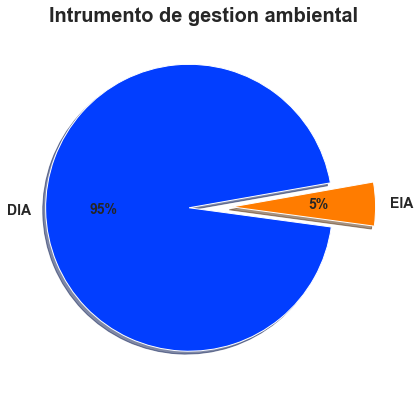

In [44]:
circular=pd.DataFrame(df["type"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2]
plt.figure(figsize=[6,8])
plt.pie(circular["type"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=10,pctdistance = 0.6, explode=explode,textprops={'size': 14, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico2", transparent=True)
plt.show()

## 3.4 Proporción del estado del proyecto

In [45]:
df["state"].value_counts()

Aprobado                     17200
No Admitido a Tramitación     3885
Desistido                     3640
Rechazado                     1205
No calificado                  512
Caducado                       147
Abandonado                      77
Revocado                        17
Renuncia RCA                     5
Name: state, dtype: int64

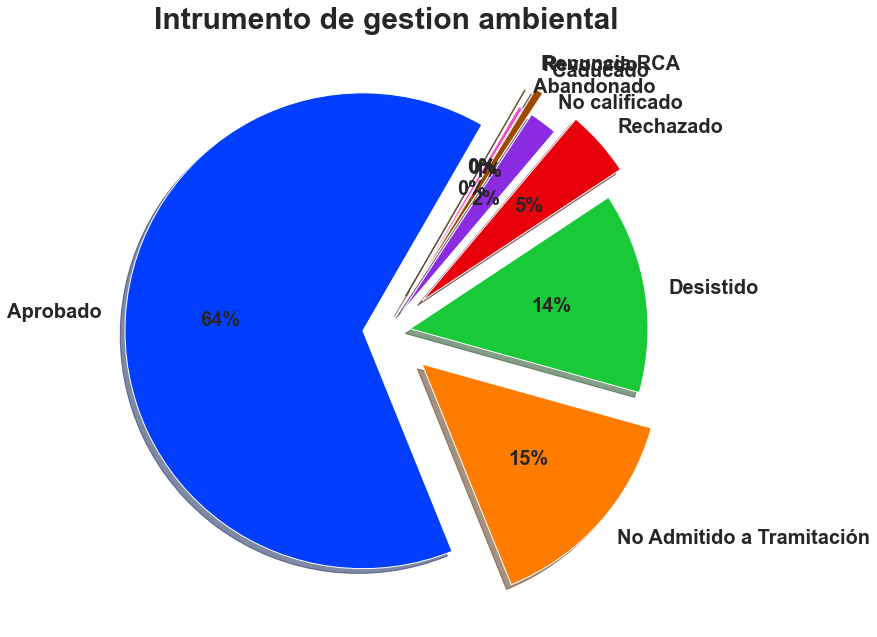

In [46]:
circular=pd.DataFrame(df["state"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2,0.1,0.2,0.1,0.2,0.1,0.2,0.2]
plt.figure(figsize=[12,12])
plt.pie(circular["state"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=60,pctdistance = 0.6, explode=explode,textprops={'size': 20, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=30,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico1", transparent=True)
plt.show()

## 3.5 Distribucín de las nuevas clases

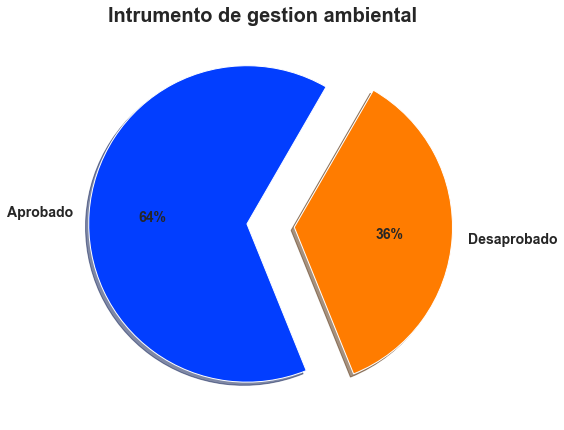

In [47]:
circular=pd.DataFrame(df["state_new"].value_counts())
#circular.index = pd.Series(['No cancelo',"Cancelo"])


colors = sb.color_palette('bright')
explode = [0.1,0.2]
plt.figure(figsize=[8,12])
plt.pie(circular["state_new"], colors = colors, autopct = '%0.0f%%', labels=list(circular.index)
        ,shadow = 'True',center = (0.1,0.4),startangle=60,pctdistance = 0.6, explode=explode,textprops={'size': 14, 'fontweight':'bold'})
plt.title("Intrumento de gestion ambiental",fontsize=20,fontweight="bold")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico3", transparent=True)
plt.show()

## 3.6 Proporcion por tipo de informe

In [48]:
circular=pd.DataFrame(df[["type","state_new"]].value_counts()).reset_index()
circular

type    state_new      0
0  DIA     Aprobado  16401
1  DIA  Desaprobado   8974
2  EIA     Aprobado    799
3  EIA  Desaprobado    514

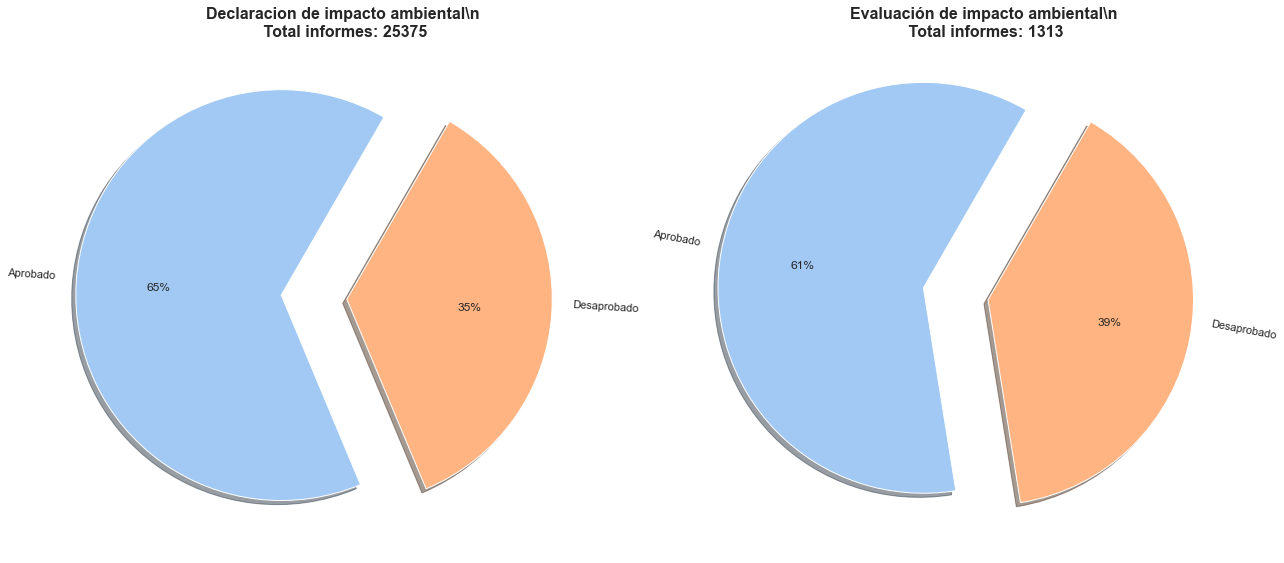

In [49]:

colors = sb.color_palette("pastel")
explode = [0.3,0.02]

fig, axes = plt.subplots(1, 2, figsize=(18, 10))


axes[0].pie(circular[0][circular["type"]=="DIA"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular["state_new"][circular["type"]=="DIA"])
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=60 );
axes[1].pie(circular[0][circular["type"]=="EIA"], colors = colors, autopct = '%0.0f%%',explode = explode, labels=list(circular["state_new"][circular["type"]=="DIA"])
        ,shadow = 'True',rotatelabels = 'true',center = (0.1,0.4),startangle=60 );
axes[0].set_title("Declaracion de impacto ambiental"+"\\n\n"+" Total informes: " +str(circular[0][circular["type"]=="DIA"].sum()), fontsize=16,fontweight="bold");
axes[1].set_title("Evaluación de impacto ambiental"+"\\n\n"+" Total informes: " +str(circular[0][circular["type"]=="EIA"].sum()), fontsize=16,fontweight="bold");
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico4", transparent=True)
plt.show()

In [50]:
#media2=df["investment"][df["investment"]<df["investment"].quantile(0.75)+1.5*(df["investment"].quantile(0.75)-df["investment"].quantile(0.25))
#np.round(media2)
df["investment"].quantile(0.75)+1.5*(df["investment"].quantile(0.75)-df["investment"].quantile(0.25))

17.3125

## 3.7 Histograma de los monto por tipo de documento

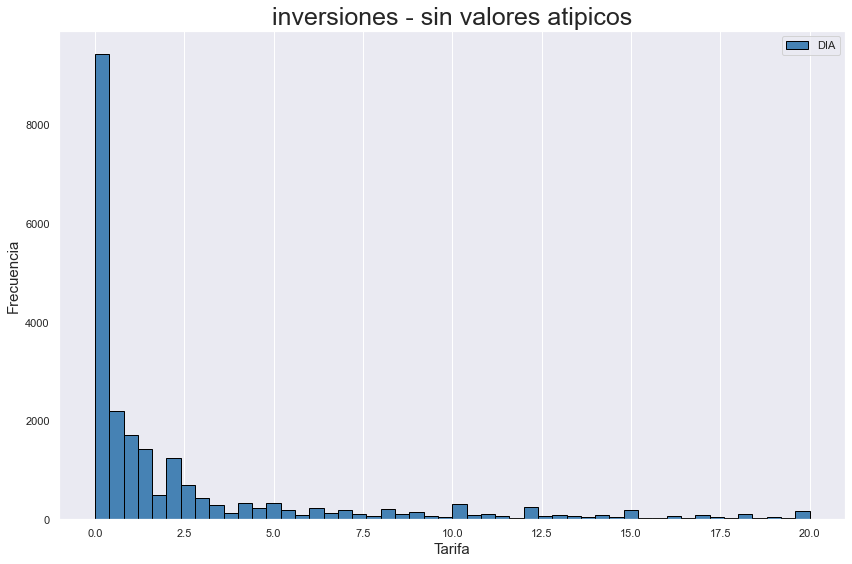

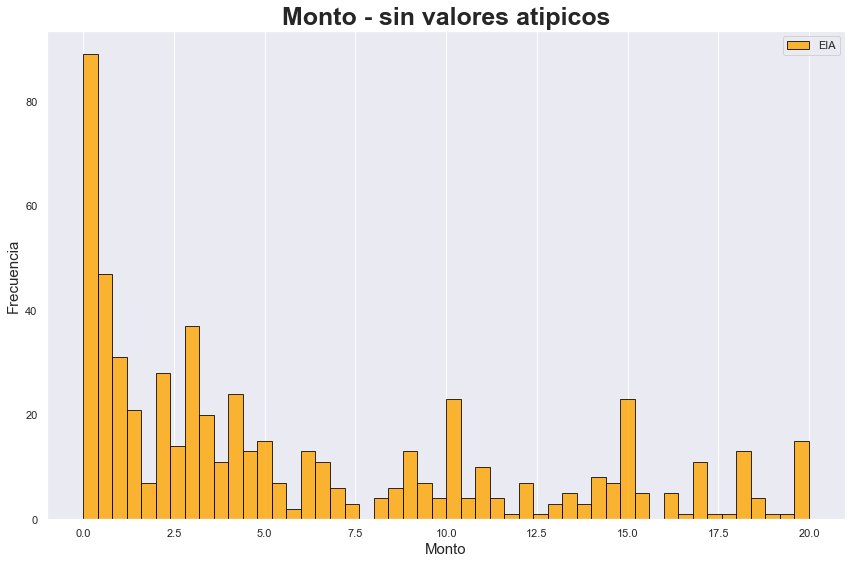

In [51]:
plt.figure(figsize=[12,8])
plt.hist(df['investment'][(df["type"]=="DIA") &(df["investment"]<=20) ],alpha = 1,label='DIA',bins=50, color='steelblue',edgecolor = 'black',  linewidth=1 );
plt.legend(loc='upper right')
plt.title("inversiones - sin valores atipicos", fontsize=25)
plt.xlabel("Tarifa",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico6", transparent=True)

plt.figure(figsize=[12,8])
plt.hist(df['investment'][(df["type"]=="EIA") &(df["investment"]<=20) ],alpha = 0.8,label='EIA',bins=50, color='orange',edgecolor = 'black',  linewidth=1);
plt.legend(loc='upper right')
plt.title("Monto - sin valores atipicos", fontsize=25,fontweight="bold")
plt.xlabel("Monto",fontsize=15)
plt.ylabel("Frecuencia",fontsize=15)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico5", transparent=True)

plt.show();

## 3.8 Cantidad por monto y cantidad de proyecto por regiones

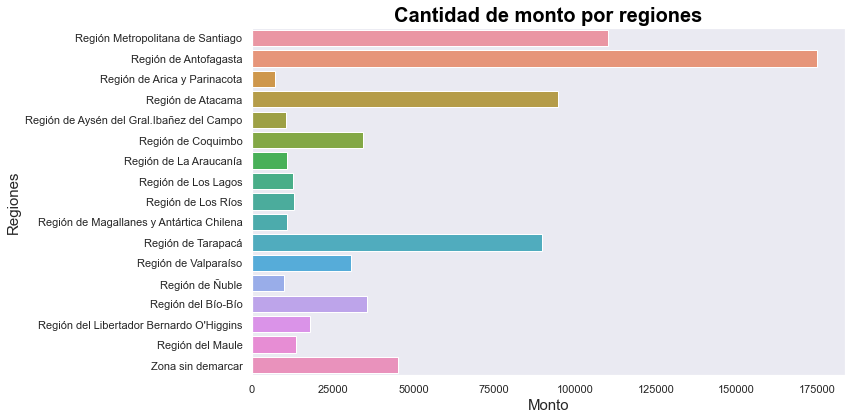

In [52]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("Region").sum()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black",fontweight="bold")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico7", transparent=True)



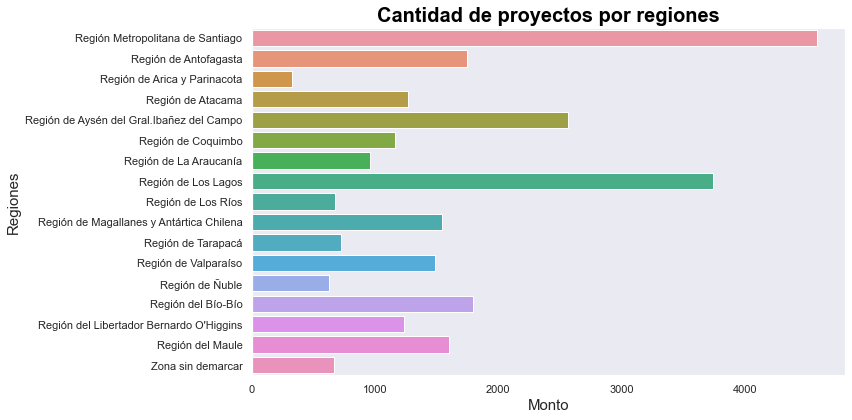

In [53]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("Region").count()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h")
plt.title("Cantidad de proyectos por regiones", fontsize=20, color="black",fontweight="bold")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico8", transparent=True)


## 3.8 Cantidad de monto y cantidad de proyecto por zona

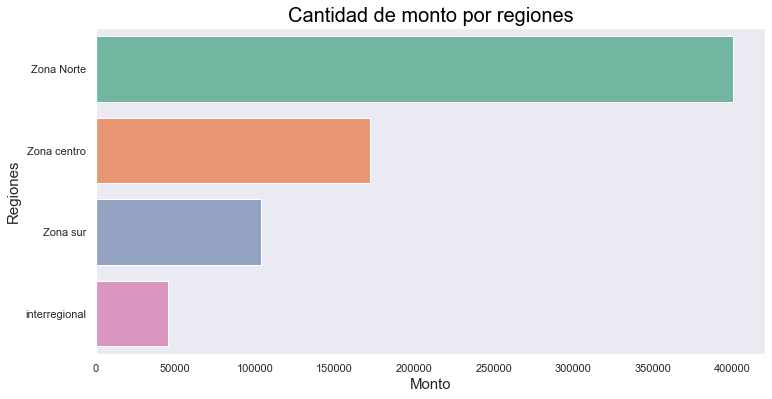

In [54]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("zona").sum()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h", palette="Set2")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);

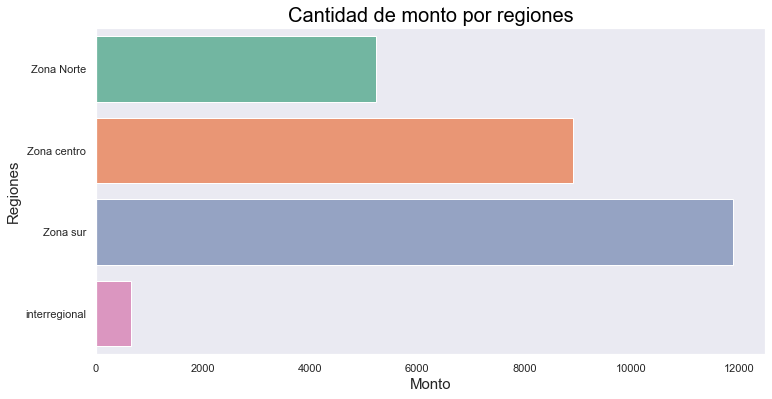

In [55]:
plt.figure(figsize=(12,6))
grafico1=pd.DataFrame(df.groupby("zona").count()["investment"])
sb.barplot(y=grafico1.index,x=grafico1["investment"],orient="h", palette="Set2")
plt.title("Cantidad de monto por regiones", fontsize=20, color="black")
plt.ylabel("Regiones", fontsize=15);
plt.grid(axis="x")
plt.xlabel("Monto",fontsize=15);

## 3.9 Histograma del numero de documento, participantes y anexos 

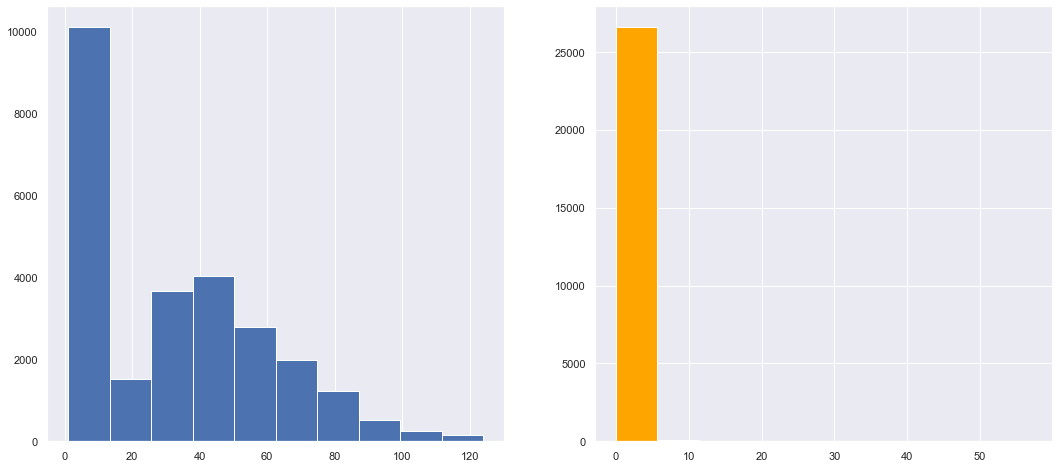

In [56]:

colors = sb.color_palette("pastel")
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)
axes[0].hist(df["n_docs"][df["n_docs"]<df["n_docs"].quantile(0.75)+1.5*(df["n_docs"].quantile(0.75)-df["n_docs"].quantile(0.25))]);
axes[1].hist(df["n_participatory"], color="orange");
axes[0].grid(axis="y")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


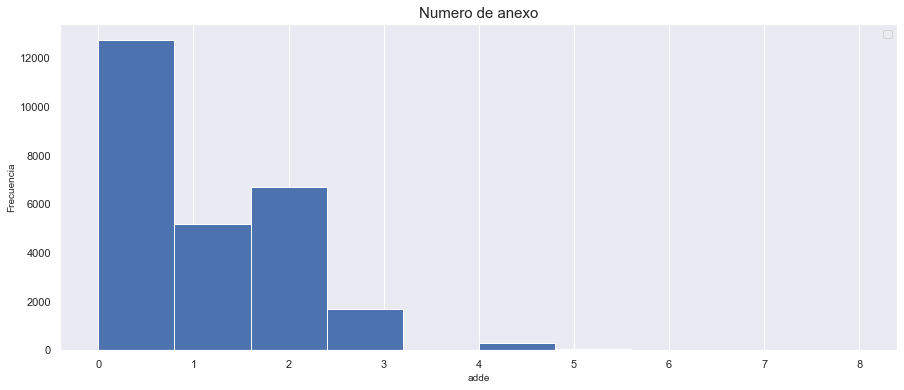

In [57]:
plt.figure(figsize=[15,6])
plt.hist(df["n_addendum"]);
plt.legend(loc='upper right')
plt.title("Numero de anexo", fontsize=15)
plt.xlabel("adde",fontsize=10)
plt.ylabel("Frecuencia",fontsize=10)
plt.grid(axis="y")

## 3.10 Cantidad de proyecto por años

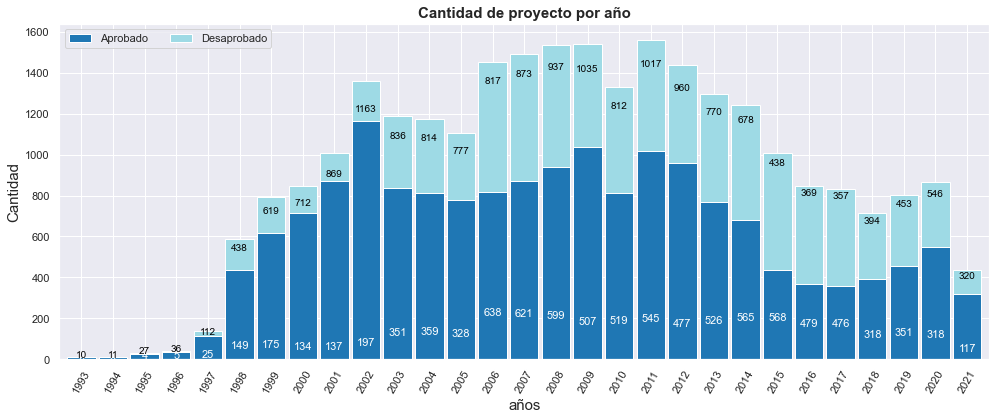

In [58]:
def add_value_label(x_list,y_list,porcentaje):
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,y_list[i-1]/3),ha="center",color="White",fontsize=11)
def add_value_label2(x_list,y_list,ybase,porcentaje):   
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,ybase[i-1]+y_list[i-1]/1.15),ha="center", color="Black",fontsize=10)

pivot=pd.DataFrame(df.groupby(["año","state_new"]).count()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="state_new",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'tab20',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );

add_value_label(list(pivot1.index),list(pivot1["Desaprobado"]),list(pivot1["Desaprobado"]))
add_value_label2(list(pivot1.index),list(pivot1["Aprobado"]),list(pivot1["Desaprobado"]),list(pivot1["Aprobado"]))

plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad de proyecto por año", fontsize=15,fontweight="bold")
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico9", transparent=True)
plt.show();

## 3.11 Cantidad de monto por años

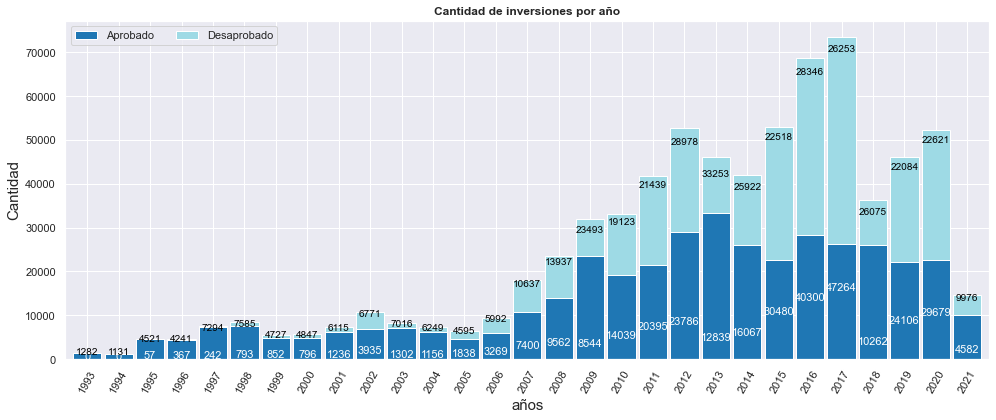

In [59]:
def add_value_label(x_list,y_list,porcentaje):
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,y_list[i-1]/3),ha="center",color="White",fontsize=11)
def add_value_label2(x_list,y_list,ybase,porcentaje):   
    for i in range(1, len(x_list)+1):
        plt.annotate(str(int(porcentaje[i-1])),(i-1,ybase[i-1]+y_list[i-1]/1.15),ha="center", color="Black",fontsize=10)

pivot=pd.DataFrame(df.groupby(["año","state_new"]).sum()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="state_new",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'tab20',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );

add_value_label(list(pivot1.index),list(pivot1["Desaprobado"]),list(pivot1["Desaprobado"]))
add_value_label2(list(pivot1.index),list(pivot1["Aprobado"]),list(pivot1["Desaprobado"]),list(pivot1["Aprobado"]))

plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad de inversiones por año",fontweight="bold")
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()
plt.tight_layout()
plt.savefig("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/grafico10", transparent=True)
plt.show();

## 3.12 Cantidad de proyectos por zona

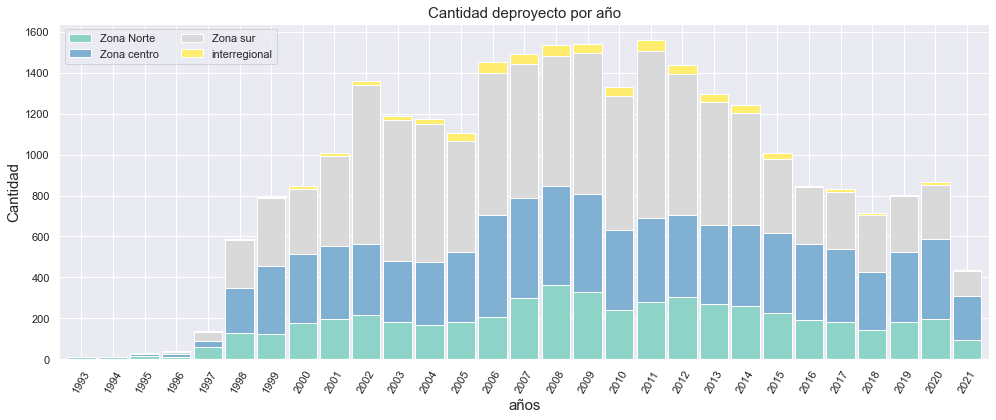

In [60]:
pivot=pd.DataFrame(df.groupby(["año","zona"]).count()["investment"]).reset_index()
pivot1=pd.pivot(data=pivot,index="año",columns="zona",values="investment").fillna(0)
pivot1.plot(kind='bar', 
                    stacked=True, 
            
                    colormap= 'Set3',
                    figsize=(14, 6),mark_right = True,
                    legend=True, width=0.90 );


plt.legend(loc="upper left", ncol=2)
plt.title("Cantidad deproyecto por año", fontsize=15)
plt.ylabel("Cantidad",fontsize=15)
plt.xlabel("años",fontsize=15)
plt.xticks(rotation=60)
plt.tight_layout()

plt.show();

## 3.13 Cantidad de proyecto por regiones

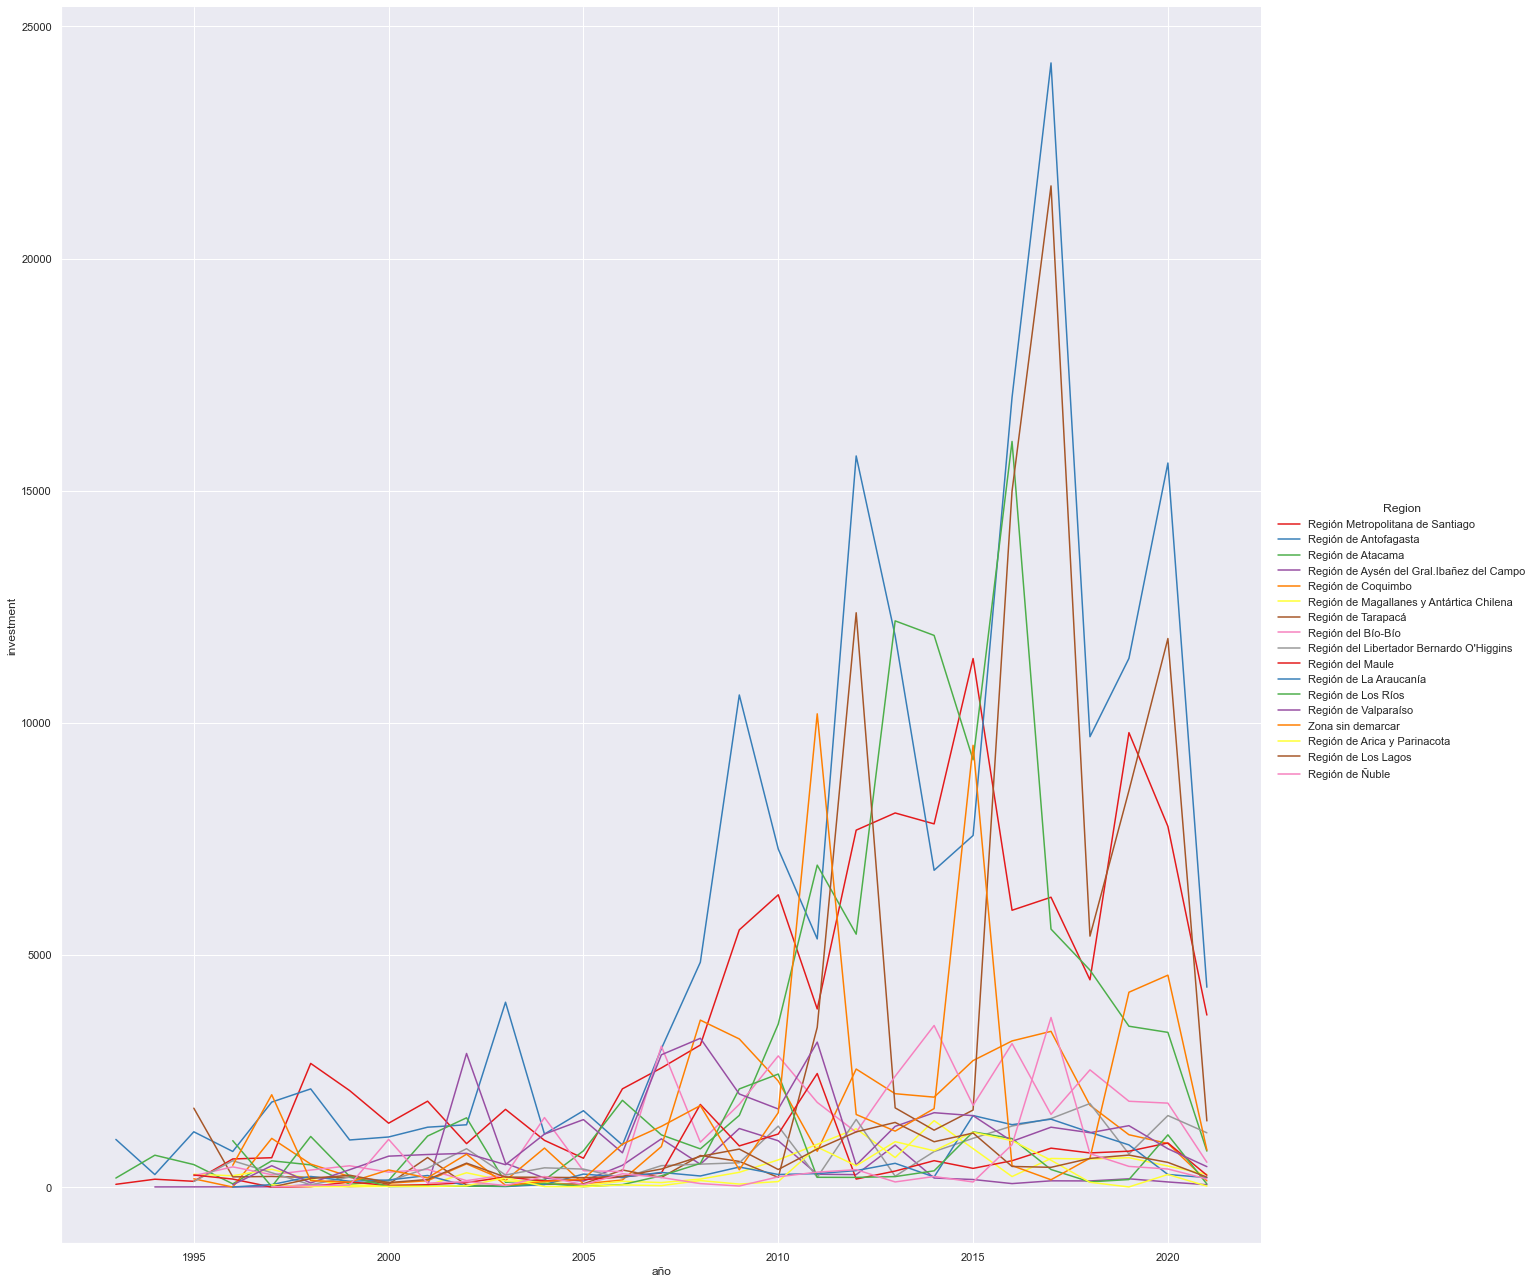

In [61]:
grafico2=pd.DataFrame(df.groupby(["año","Region"]).sum()["investment"]).reset_index()
sb.relplot(data=grafico2,x="año", y="investment",hue="Region",kind="line",height=18, palette="Set1", legend="auto" );


# 4.- Visualización en geopandas

In [62]:
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## 4.1 Mapa de calor por inversiones

In [65]:
m_5 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=4)

HeatMap(data=df[["latitude","longitude","investment"]].values, radius=12).add_to(m_5)

# Display the map
#m_5.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename.html")
m_5

In [67]:
df["zona"].value_counts()

Zona sur         11901
Zona centro       8900
Zona Norte        5224
interregional      663
Name: zona, dtype: int64

## 4.2 Mapa de proyectos por zona

### 4.2.1 Mapa de la zona sur
**Elimino la salida para poder subir a github**

In [ ]:
# Create a base map
m_4 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=4)

def color_producer(val):
    if val =="Aprobado" :
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(df[df["zona"]=="Zona sur"])):
    Circle(
        location=[df[df["zona"]=="Zona sur"]["latitude"].iloc[i],df[df["zona"]=="Zona sur"]["longitude"].iloc[i]],
        radius=20,
        color=color_producer(df[df["zona"]=="Zona sur"].iloc[i]['state'])).add_to(m_4)
#m_4.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename1.html")
m_4

### 4.2.2 Mapa de la zona norte
**Elimino la salida para poder subir a github**

In [ ]:
m_4 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=4)

def color_producer(val):
    if val =="Aprobado" :
        return 'forestgreen'
    else:
        return 'darkred'

for i in range(0,len(df[df["zona"]=="Zona Norte"])):
    Circle(
        location=[df[df["zona"]=="Zona Norte"]["latitude"].iloc[i],df[df["zona"]=="Zona Norte"]["longitude"].iloc[i]],
        radius=20,
        color=color_producer(df[df["zona"]=="Zona Norte"].iloc[i]['state'])).add_to(m_4)
#m_4.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename2.html")
m_4

### 4.2.3 Mapa de la zona centro

In [70]:
m_4 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=4)

def color_producer(val):
    if val =="Aprobado" :
        return 'forestgreen'
    else:
        retur## 4.2.1 Mapa de la zona surn 'darkred'

# Add a bubble map to the base map
for i in range(0,len(df[df["zona"]=="Zona centro"])):
    Circle(
        location=[df[df["zona"]=="Zona centro"]["latitude"].iloc[i],df[df["zona"]=="Zona centro"]["longitude"].iloc[i]],
        radius=20,
        color=color_producer(df[df["zona"]=="Zona centro"].iloc[i]['state'])).add_to(m_4)
m_4.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename3.html")

m_4

### 4.2.4 Mapa de la zona interregional

In [71]:
## 4.2.1 Mapa de la zona surm_4 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=4)

def color_producer(val):
    if val =="Aprobado" :
        return 'forestgreen'
    else:
        return 'darkred'

# Add a bubble map to the base map
for i in range(0,len(df[df["zona"]=="interregional"])):
    Circle(
        location=[df[df["zona"]=="interregional"]["latitude"].iloc[i],df[df["zona"]=="interregional"]["longitude"].iloc[i]],
        radius=20,
        color=color_producer(df[df["zona"]=="interregional"].iloc[i]['state'])).add_to(m_4)

m_4

## 4.3 Mapa de burbuja
**Elimino la salida para poder subir a github**

In [ ]:
## 4.2.1 Mapa de la zona surimport math
m_3 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for i in range(len(df)):
    if not math.isnan(df["longitude"].iloc[i]) and not math.isnan(df["latitude"].iloc[i]):
        mc.add_child(Marker([df["latitude"].iloc[i], df["longitude"].iloc[i]]))
m_3.add_child(mc)
#m_3.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename4.html")
m_3

## 4.4 Mapa de inversión por región

### 4.4.1 Cargo la delimitación por zona

In [99]:
datos_chile=gpd.read_file("C:/Users/crist/Python_jupiter/Base de datos - geopandas/Bordes de chile - Regional - A pobladas- comunas/Regional.shp")
datos_chile.head()

objectid  cir_sena  codregion        area_km    st_area_sh    st_length_  \
0      1084         1         15   16866.819844  1.886869e+10  7.505296e+05   
1      1085         2          1   42284.567484  4.830637e+10  1.213713e+06   
2      1086         3          2  126071.431981  1.508452e+11  2.516112e+06   
3      1087        15         12  133053.142345  3.581316e+11  9.049830e+07   
4      1088        14         11  106703.377369  2.242743e+11  4.144481e+07   

                                      Region  \
0               Región de Arica y Parinacota   
1                         Región de Tarapacá   
2                      Región de Antofagasta   
3   Región de Magallanes y Antártica Chilena   
4  Región de Aysén del Gral.Ibañez del Campo   

                                            geometry  
0  POLYGON ((-7727277.278 -1997230.768, -7726464....  
1  MULTIPOLYGON (((-7810213.515 -2298008.280, -78...  
2  MULTIPOLYGON (((-7870470.961 -2985679.186, -78...  
3  MULTIPOLYGON (((-7494057.535 -7542535.383, -74...  
4  MULTIPOLYGON (((-8413517.696 -6234055.255, -84...

In [100]:
regiones=pd.DataFrame(df.groupby("Region").sum()["investment"]).reset_index()
regiones

Region   investment
0            Región Metropolitana de Santiago  110113.2972
1                       Región de Antofagasta  174896.3877
2                Región de Arica y Parinacota    6999.3368
3                           Región de Atacama   94721.8177
4   Región de Aysén del Gral.Ibañez del Campo   10596.5786
5                          Región de Coquimbo   34285.2233
6                      Región de La Araucanía   10949.2617
7                         Región de Los Lagos   12799.2511
8                          Región de Los Ríos   12930.7690
9    Región de Magallanes y Antártica Chilena   10959.2649
10                         Región de Tarapacá   89635.8634
11                       Región de Valparaíso   30716.2345
12                            Región de Ñuble    9892.0394
13                         Región del Bío-Bío   35687.0128
14   Región del Libertador Bernardo O'Higgins   18110.6103
15                           Región del Maule   13644.9384
16                          Zona sin demarcar   45260.8814

In [101]:
import geopandas

communities_geo  = geopandas.read_file("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/bolde_regiones/Regional.shp")
communities_geo=communities_geo[["Region","geometry"]].set_index("Region")
#communities_geo.index=['Región de Antofagasta','Región de La Araucanía','Región de Atacama',
              #         'Región de Aysén del Gral.Ibañez del Campo',
               #       'Región del Bío-Bío','Región de Coquimbo', "Región del Libertador Bernardo O'Higgins",
                #       'Región de Magallanes y Antártica Chilena','Región del Maule','Región Metropolitana de Santiago',
                 
                #'Región de Valparaíso','Región de Tarapacá','Región de Arica y Parinacota','Región de Los Ríos','Región de Los Lagos']
communities_geo

geometry
Region                                                                                      
Región de Arica y Parinacota               POLYGON ((-7727277.278 -1997230.768, -7726464....
Región de Tarapacá                         MULTIPOLYGON (((-7810213.515 -2298008.280, -78...
Región de Antofagasta                      MULTIPOLYGON (((-7870470.961 -2985679.186, -78...
Región de Magallanes y Antártica Chilena   MULTIPOLYGON (((-7494057.535 -7542535.383, -74...
Región de Aysén del Gral.Ibañez del Campo  MULTIPOLYGON (((-8413517.696 -6234055.255, -84...
Región de Atacama                          MULTIPOLYGON (((-7932747.769 -3311218.615, -79...
Región de Coquimbo                         MULTIPOLYGON (((-7963268.900 -3784870.143, -79...
Región de Valparaíso                       MULTIPOLYGON (((-8991645.917 -3991821.789, -89...
Región Metropolitana de Santiago           POLYGON ((-7873736.745 -3885505.642, -7873695....
Región de Los Lagos                        MULTIPOLYGON (((-8331768.181 -5403721.402, -83...
Región de Los Ríos                         MULTIPOLYGON (((-8206761.210 -4900095.562, -82...
Región de La Araucanía                     POLYGON ((-8101075.126 -4521676.016, -8101101....
Región del Bío-Bío                         MULTIPOLYGON (((-8231985.748 -4624218.142, -82...
Región de Ñuble                            POLYGON ((-8053806.540 -4431488.942, -8053866....
Región del Maule                           POLYGON ((-8018823.211 -4121471.456, -8018820....
Región del Libertador Bernardo O'Higgins   MULTIPOLYGON (((-8002300.862 -4023671.372, -80...
Zona sin demarcar                          POLYGON ((-8197676.045 -6303383.769, -8112196....

In [102]:
regiones=pd.merge(communities_geo,regiones,left_index=True,right_on="Region")#.set_index("Region")
regiones

geometry  \
2   POLYGON ((-7727277.278 -1997230.768, -7726464....   
10  MULTIPOLYGON (((-7810213.515 -2298008.280, -78...   
1   MULTIPOLYGON (((-7870470.961 -2985679.186, -78...   
9   MULTIPOLYGON (((-7494057.535 -7542535.383, -74...   
4   MULTIPOLYGON (((-8413517.696 -6234055.255, -84...   
3   MULTIPOLYGON (((-7932747.769 -3311218.615, -79...   
5   MULTIPOLYGON (((-7963268.900 -3784870.143, -79...   
11  MULTIPOLYGON (((-8991645.917 -3991821.789, -89...   
0   POLYGON ((-7873736.745 -3885505.642, -7873695....   
7   MULTIPOLYGON (((-8331768.181 -5403721.402, -83...   
8   MULTIPOLYGON (((-8206761.210 -4900095.562, -82...   
6   POLYGON ((-8101075.126 -4521676.016, -8101101....   
13  MULTIPOLYGON (((-8231985.748 -4624218.142, -82...   
12  POLYGON ((-8053806.540 -4431488.942, -8053866....   
15  POLYGON ((-8018823.211 -4121471.456, -8018820....   
14  MULTIPOLYGON (((-8002300.862 -4023671.372, -80...   
16  POLYGON ((-8197676.045 -6303383.769, -8112196....   

                                       Region   investment  
2                Región de Arica y Parinacota    6999.3368  
10                         Región de Tarapacá   89635.8634  
1                       Región de Antofagasta  174896.3877  
9    Región de Magallanes y Antártica Chilena   10959.2649  
4   Región de Aysén del Gral.Ibañez del Campo   10596.5786  
3                           Región de Atacama   94721.8177  
5                          Región de Coquimbo   34285.2233  
11                       Región de Valparaíso   30716.2345  
0            Región Metropolitana de Santiago  110113.2972  
7                         Región de Los Lagos   12799.2511  
8                          Región de Los Ríos   12930.7690  
6                      Región de La Araucanía   10949.2617  
13                         Región del Bío-Bío   35687.0128  
12                            Región de Ñuble    9892.0394  
15                           Región del Maule   13644.9384  
14   Región del Libertador Bernardo O'Higgins   18110.6103  
16                          Zona sin demarcar   45260.8814

### 4.4.2 Grafico de inversión por zona
**Elimino la salida para poder subir a github**

In [ ]:
m = folium.Map(location=[-32.892685,-90.452305], zoom_start=3)

folium.Choropleth(
    geo_data=regiones,
    name="choropleth",
    data=regiones,
    columns=['Region','investment'],
    key_on="feature.properties.Region",
    fill_color='YlGnBu',
    fill_opacity=1,
    gkeyline_opacity=0.2,
    legend_name="Monto de los proyectos por regiones"
).add_to(m)

folium.LayerControl().add_to(m)

#m.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename5.html")
m

## 4.5 Zona protegidas
**iNFORMACIÓN OBTENIDAD DE:** https://www.bcn.cl/siit/mapas_vectoriales

Esta información servira para asociar a los proyecto que se realizan cercano a estas zona

In [120]:
datos_protegido=gpd.read_file("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/zonas_protegidas/snaspe.shp",SHAPE_RESTORE_SHX=True)
datos_protegido

objectid    st_area_sh    st_length_                    Nombre  \
0       10921  1.970656e+09  1.388746e+06        P.N.Cabo de Hornos   
1       10150  2.663508e+02  2.139039e+02                      None   
2       10142  3.143100e+04  9.173960e+02                      None   
3       10129  4.558119e+04  8.557300e+02                      None   
4       10126  3.025963e+05  2.331806e+03                      None   
..        ...           ...           ...                       ...   
132     12469  5.376587e+09  1.192382e+06            Parque Pumalín   
133     12471  7.210095e+07  1.238586e+05  Parque Nacional Rapa Nui   
134     12473  1.455558e+07  1.538017e+04  Parque Nacional Rapa Nui   
135     12472  1.234812e+06  4.720501e+03  Parque Nacional Rapa Nui   
136     12871  1.518290e+08  1.699123e+05       P.N. Juan Fernández   

    Tipo_Snasp                                    Region  Cod_Region  \
0       Parque  Región de Magallanes y Antártica Chilena          12   
1         None  Región de Magallanes y Antártica Chilena          12   
2         None  Región de Magallanes y Antártica Chilena          12   
3         None  Región de Magallanes y Antártica Chilena          12   
4         None  Región de Magallanes y Antártica Chilena          12   
..         ...                                       ...         ...   
132     Parque                       Región de Los Lagos          10   
133     Parque                      Región de Valparaíso           5   
134     Parque                      Región de Valparaíso           5   
135     Parque                      Región de Valparaíso           5   
136     Parque                      Región de Valparaíso           5   

                                              geometry  
0    MULTIPOLYGON (((-7499543.521 -7472699.191, -74...  
1    POLYGON ((-7717793.718 -7290127.662, -7717723....  
2    POLYGON ((-7948929.157 -7162664.662, -7948951....  
3    POLYGON ((-7953613.979 -7169386.636, -7953666....  
4    POLYGON ((-7948899.703 -7162143.158, -7948928....  
..                                                 ...  
132  MULTIPOLYGON (((-8042694.640 -5235224.003, -80...  
133  POLYGON ((-12177090.007 -3130867.041, -1217708...  
134  POLYGON ((-12182937.223 -3143895.870, -1218270...  
135  POLYGON ((-12178144.007 -3141576.637, -1217817...  
136  MULTIPOLYGON (((-8993581.580 -4003769.913, -89...  

[137 rows x 8 columns]

In [121]:
datos_protegido=datos_protegido[["objectid","geometry","st_area_sh"]]


In [122]:
datos_protegido["st_area_sh"]=datos_protegido["st_area_sh"].apply(lambda x: int(x))
datos_protegido

C:\Users\crist\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


objectid                                           geometry  st_area_sh
0       10921  MULTIPOLYGON (((-7499543.521 -7472699.191, -74...  1970655770
1       10150  POLYGON ((-7717793.718 -7290127.662, -7717723....         266
2       10142  POLYGON ((-7948929.157 -7162664.662, -7948951....       31430
3       10129  POLYGON ((-7953613.979 -7169386.636, -7953666....       45581
4       10126  POLYGON ((-7948899.703 -7162143.158, -7948928....      302596
..        ...                                                ...         ...
132     12469  MULTIPOLYGON (((-8042694.640 -5235224.003, -80...  5376586523
133     12471  POLYGON ((-12177090.007 -3130867.041, -1217708...    72100946
134     12473  POLYGON ((-12182937.223 -3143895.870, -1218270...    14555575
135     12472  POLYGON ((-12178144.007 -3141576.637, -1217817...     1234811
136     12871  MULTIPOLYGON (((-8993581.580 -4003769.913, -89...   151828984

[137 rows x 3 columns]

### 4.5.1 Grafico Zona protegidas
**Elimino la salida para poder subir a github**

In [ ]:
m = folium.Map(location=[-32.892685,-90.452305], zoom_start=3)

folium.Choropleth(
    geo_data=datos_protegido,
    name="choropleth",
    data=datos_protegido,
    columns=["objectid",'st_area_sh'],
    key_on="feature.properties.objectid",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name="Unemployment Rate (%)",
    reset=True,
).add_to(m)

folium.LayerControl().add_to(m)
#m.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename6.html")
m

## Guargo data de avance

In [131]:
df.to_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/avance1.xlsx",index=False)

In [132]:
df

name type   region  \
0                            BALNEARIO FLUVIAL RÍO DAMAS  DIA   Décima   
1      Aumento de Extracción y Procesamiento, Pozo El...  DIA   Novena   
2      CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...  DIA       RM   
3                        Parque Fotovoltaico Andrómeda 2  DIA   Quinta   
4                              Parque Fotovoltaico Colmo  DIA   Quinta   
...                                                  ...  ...      ...   
26736                                  Ulexita Granulada  EIA  Segunda   
26737                  Planta Integrada Productos Tissue  EIA       RM   
26738                      Fundición REFIMET Antofagasta  EIA  Segunda   
26739                                            Guanaco  EIA  Segunda   
26740      Cobre en Cátodos en Planta Coloso-Antofagasta  EIA  Segunda   

                                            owner typology  \
0      Inversiones y Comercial Southern World SpA       g2   
1                            Forestal Arauco S.A.       i5   
2            Compañia Minera Santa Laura Limitada       i5   
3                        Solek Chile Services SpA        c   
4                        Solek Chile Services SpA        c   
...                                           ...      ...   
26736                               QUIBORAX S.A.       k1   
26737                            CMPC Tissue S.A.       m4   
26738                      FUNDICION REFIMET S.A.        t   
26739                    Amax Gold de Chile Ltda.       i4   
26740                   MINERA ESCONDIDA LIMITADA       i4   

                                            typology_des  investment  \
0      Proyecto de desarrollo turístico (destinados e...        30.4   
1              Proyectos de extracción de áridos y greda         0.5   
2              Proyectos de extracción de áridos y greda         1.0   
3        Centrales generadoras de energía mayores a 3 MW         5.0   
4        Centrales generadoras de energía mayores a 3 MW        10.0   
...                                                  ...         ...   
26736              Instalaciones fabriles sobre 2000 KVA         2.0   
26737  Industrias de celulosas, de pasta de papel y d...        60.0   
26738                                 Ingreso voluntario        60.0   
26739  Proyecto de desarrollo minero sobre 5000 tons/...        70.0   
26740  Proyecto de desarrollo minero sobre 5000 tons/...       250.0   

      entry_date qualification_date  id_project  ...  n_docs  n_addendum  \
0     2021-03-09         2021-08-17  2151031299  ...       9           0   
1     2021-03-05         2021-08-13  2150963916  ...       9           0   
2     2021-03-02         2021-08-10  2150897519  ...       9           0   
3     2021-02-25         2021-08-05  2150870379  ...      13           0   
4     2021-02-24         2021-08-04  2150870374  ...      18           0   
...          ...                ...         ...  ...     ...         ...   
26736 1993-06-15         1993-10-08         885  ...       4           0   
26737 1993-04-02         1993-09-16        1036  ...       8           1   
26738 1992-06-13         1993-09-13      903427  ...       3           0   
26739 1992-02-02         1993-07-22        3023  ...       2           0   
26740 1992-07-29         1993-01-04         884  ...       5           0   

       n_participatory                                           main_url  \
0                    0  https://seia.sea.gob.cl/expediente/expediente....   
1                    0  https://seia.sea.gob.cl/expediente/expediente....   
2                    0  https://seia.sea.gob.cl/expediente/expediente....   
3                    0  https://seia.sea.gob.cl/expediente/expediente....   
4                    0  https://seia.sea.gob.cl/expediente/expediente....   
...                ...                                                ...   
26736                0  https://seia.sea.gob.cl/expediente/expediente....   
26737                0  